# CLASSIFICAÇÃO DE EXOPLANETAS

## Instruções Gerais

Pode ser necessario normalizar os dados e testar diferentes valores para os hiperparametros dos metodos para se obter bons resultados (nao e necessario entregar todas as combinacoes testadas, apenas a de melhor resultado, exceto os casos que foram pedidos abaixo). 

A avaliacao dos metodos devera ser feito usando a acuracia e validacao ruzada k-fold com k igual a 5.

Ao final devera ser feita uma comparacao entre a performance dos metodos, incluindo curva ROC e as metricas de precisao e revocacao (precision e recall).



## Importando os pacotes


In [11]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
from google.colab import drive
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [12]:
print('Pandas',pd.__version__)
print('matplotlib', matplotlib.__version__)
print('numpy', np.__version__)
print('sklearn', sk.__version__)


Pandas 1.3.5
matplotlib 3.2.2
numpy 1.21.5
sklearn 1.0.2


## Ajustes para reprodutibilidade dos dados

In [13]:
seed=29 # para fixar a geração de numeros aleatórios
k_fold = 5 #k-Fold da validação cruzada
test_size = 0.35 #35% dos dados para teste

## Importando o arquivo

Dados retirados do NASA Exoplanet Archive (https://exoplanetarchive.ipac.caltech.edu/)

Para ler arquivo com upload direto para o colab, copiar path ao lado e colar em csv_file

Para leitura do arquivo diretamento do Google Drive, copiar o path do arquivo em csv_file

In [14]:
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
csv_file = '/content/drive/MyDrive/Mestrado/ML/koi_data.csv'
df = pd.read_csv(csv_file)
df

,kepoi_name,koi_disposition,koi_period,koi_impact,koi_duration,koi_depth,koi_ror,koi_srho,koi_prad,koi_sma,...,koi_fwm_srao,koi_fwm_sdeco,koi_fwm_prao,koi_fwm_pdeco,koi_dicco_mra,koi_dicco_mdec,koi_dicco_msky,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky
0,K00752.01,CONFIRMED,9.48804,0.146,2.95750,615.8,0.02234,3.20796,2.26,0.0853,...,0.430,0.940,-0.00020,-0.00055,-0.010,0.200,0.200,0.080,0.310,0.320
1,K00752.02,CONFIRMED,54.41838,0.586,4.50700,874.8,0.02795,3.02368,2.83,0.2734,...,-0.630,1.230,0.00066,-0.00105,0.390,0.000,0.390,0.490,0.120,0.500
2,K00754.01,FALSE POSITIVE,1.73695,1.276,2.40641,8079.2,0.38739,0.22080,33.46,0.0267,...,-0.111,0.002,0.00302,-0.00142,-0.249,0.147,0.289,-0.257,0.099,0.276
3,K00755.01,CONFIRMED,2.52559,0.701,1.65450,603.3,0.02406,1.98635,2.75,0.0374,...,-0.010,0.230,0.00008,-0.00007,0.030,-0.090,0.100,0.070,0.020,0.070
4,K00114.01,FALSE POSITIVE,7.36179,1.169,5.02200,233.7,0.18339,0.00485,39.21,0.0820,...,-13.450,24.090,0.00303,-0.00555,-4.506,7.710,8.930,-4.537,7.713,8.948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5197,K08198.01,FALSE POSITIVE,373.89398,0.963,27.66000,730.0,0.03288,0.00771,2.51,0.8885,...,-1.000,-0.300,0.00060,0.00030,2.360,-0.990,2.550,2.370,-0.910,2.540
5198,K07984.01,FALSE POSITIVE,8.58987,0.765,4.80600,87.7,0.00936,0.18863,1.11,0.0779,...,1.100,1.200,-0.00008,-0.00010,1.260,-1.200,1.750,1.350,-1.300,1.840
5199,K07985.01,FALSE POSITIVE,0.52770,1.252,3.22210,1579.2,0.29763,0.16318,29.35,0.0128,...,0.792,-0.484,-0.00024,0.00018,2.132,-1.757,2.763,2.344,-1.756,2.929
5200,K07987.01,FALSE POSITIVE,0.68140,0.147,0.86500,103.6,0.00944,8.97692,1.07,0.0157,...,7.200,-5.600,-0.00072,0.00050,3.410,-3.650,5.000,3.380,-3.890,5.160


Vamos visualizar os nomes dos KOI

In [16]:
df["kepoi_name"]

0       K00752.01
1       K00752.02
2       K00754.01
3       K00755.01
4       K00114.01
          ...    
5197    K08198.01
5198    K07984.01
5199    K07985.01
5200    K07987.01
5201    K07989.01
Name: kepoi_name, Length: 5202, dtype: object

Agora vamos isolar os dados que contem as labels/gabarito, indicando se o KOI é ou não é um Exoplaneta

In [17]:
Y = df["koi_disposition"] #Labels de resposta esperada
Y

0            CONFIRMED
1            CONFIRMED
2       FALSE POSITIVE
3            CONFIRMED
4       FALSE POSITIVE
             ...      
5197    FALSE POSITIVE
5198    FALSE POSITIVE
5199    FALSE POSITIVE
5200    FALSE POSITIVE
5201    FALSE POSITIVE
Name: koi_disposition, Length: 5202, dtype: object

Isolando agora as features

In [18]:
X = df[df.columns[2:]]
X

,koi_period,koi_impact,koi_duration,koi_depth,koi_ror,koi_srho,koi_prad,koi_sma,koi_incl,koi_teq,...,koi_fwm_srao,koi_fwm_sdeco,koi_fwm_prao,koi_fwm_pdeco,koi_dicco_mra,koi_dicco_mdec,koi_dicco_msky,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky
0,9.48804,0.146,2.95750,615.8,0.02234,3.20796,2.26,0.0853,89.66,793.0,...,0.430,0.940,-0.00020,-0.00055,-0.010,0.200,0.200,0.080,0.310,0.320
1,54.41838,0.586,4.50700,874.8,0.02795,3.02368,2.83,0.2734,89.57,443.0,...,-0.630,1.230,0.00066,-0.00105,0.390,0.000,0.390,0.490,0.120,0.500
2,1.73695,1.276,2.40641,8079.2,0.38739,0.22080,33.46,0.0267,67.09,1395.0,...,-0.111,0.002,0.00302,-0.00142,-0.249,0.147,0.289,-0.257,0.099,0.276
3,2.52559,0.701,1.65450,603.3,0.02406,1.98635,2.75,0.0374,85.41,1406.0,...,-0.010,0.230,0.00008,-0.00007,0.030,-0.090,0.100,0.070,0.020,0.070
4,7.36179,1.169,5.02200,233.7,0.18339,0.00485,39.21,0.0820,60.92,1342.0,...,-13.450,24.090,0.00303,-0.00555,-4.506,7.710,8.930,-4.537,7.713,8.948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5197,373.89398,0.963,27.66000,730.0,0.03288,0.00771,2.51,0.8885,88.57,206.0,...,-1.000,-0.300,0.00060,0.00030,2.360,-0.990,2.550,2.370,-0.910,2.540
5198,8.58987,0.765,4.80600,87.7,0.00936,0.18863,1.11,0.0779,85.14,929.0,...,1.100,1.200,-0.00008,-0.00010,1.260,-1.200,1.750,1.350,-1.300,1.840
5199,0.52770,1.252,3.22210,1579.2,0.29763,0.16318,29.35,0.0128,20.78,2088.0,...,0.792,-0.484,-0.00024,0.00018,2.132,-1.757,2.763,2.344,-1.756,2.929
5200,0.68140,0.147,0.86500,103.6,0.00944,8.97692,1.07,0.0157,88.60,2218.0,...,7.200,-5.600,-0.00072,0.00050,3.410,-3.650,5.000,3.380,-3.890,5.160


Verificando a presença de valores ausentes no banco de dados. Não há.

In [19]:
df.count()

kepoi_name          5202
koi_disposition     5202
koi_period          5202
koi_impact          5202
koi_duration        5202
koi_depth           5202
koi_ror             5202
koi_srho            5202
koi_prad            5202
koi_sma             5202
koi_incl            5202
koi_teq             5202
koi_insol           5202
koi_dor             5202
koi_max_sngle_ev    5202
koi_max_mult_ev     5202
koi_model_snr       5202
koi_steff           5202
koi_slogg           5202
koi_smet            5202
koi_srad            5202
koi_smass           5202
koi_kepmag          5202
koi_gmag            5202
koi_rmag            5202
koi_imag            5202
koi_zmag            5202
koi_jmag            5202
koi_hmag            5202
koi_kmag            5202
koi_fwm_stat_sig    5202
koi_fwm_sra         5202
koi_fwm_sdec        5202
koi_fwm_srao        5202
koi_fwm_sdeco       5202
koi_fwm_prao        5202
koi_fwm_pdeco       5202
koi_dicco_mra       5202
koi_dicco_mdec      5202
koi_dicco_msky      5202


In [20]:
df.isna().sum()

kepoi_name          0
koi_disposition     0
koi_period          0
koi_impact          0
koi_duration        0
koi_depth           0
koi_ror             0
koi_srho            0
koi_prad            0
koi_sma             0
koi_incl            0
koi_teq             0
koi_insol           0
koi_dor             0
koi_max_sngle_ev    0
koi_max_mult_ev     0
koi_model_snr       0
koi_steff           0
koi_slogg           0
koi_smet            0
koi_srad            0
koi_smass           0
koi_kepmag          0
koi_gmag            0
koi_rmag            0
koi_imag            0
koi_zmag            0
koi_jmag            0
koi_hmag            0
koi_kmag            0
koi_fwm_stat_sig    0
koi_fwm_sra         0
koi_fwm_sdec        0
koi_fwm_srao        0
koi_fwm_sdeco       0
koi_fwm_prao        0
koi_fwm_pdeco       0
koi_dicco_mra       0
koi_dicco_mdec      0
koi_dicco_msky      0
koi_dikco_mra       0
koi_dikco_mdec      0
koi_dikco_msky      0
dtype: int64

## MinMax Scaler

Vamos escalar nossos dados utilizando o Mix Max Scaler para evitar que as escalas dos dados atrapalhe no ajuste dos modelos. 

In [21]:
X

,koi_period,koi_impact,koi_duration,koi_depth,koi_ror,koi_srho,koi_prad,koi_sma,koi_incl,koi_teq,...,koi_fwm_srao,koi_fwm_sdeco,koi_fwm_prao,koi_fwm_pdeco,koi_dicco_mra,koi_dicco_mdec,koi_dicco_msky,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky
0,9.48804,0.146,2.95750,615.8,0.02234,3.20796,2.26,0.0853,89.66,793.0,...,0.430,0.940,-0.00020,-0.00055,-0.010,0.200,0.200,0.080,0.310,0.320
1,54.41838,0.586,4.50700,874.8,0.02795,3.02368,2.83,0.2734,89.57,443.0,...,-0.630,1.230,0.00066,-0.00105,0.390,0.000,0.390,0.490,0.120,0.500
2,1.73695,1.276,2.40641,8079.2,0.38739,0.22080,33.46,0.0267,67.09,1395.0,...,-0.111,0.002,0.00302,-0.00142,-0.249,0.147,0.289,-0.257,0.099,0.276
3,2.52559,0.701,1.65450,603.3,0.02406,1.98635,2.75,0.0374,85.41,1406.0,...,-0.010,0.230,0.00008,-0.00007,0.030,-0.090,0.100,0.070,0.020,0.070
4,7.36179,1.169,5.02200,233.7,0.18339,0.00485,39.21,0.0820,60.92,1342.0,...,-13.450,24.090,0.00303,-0.00555,-4.506,7.710,8.930,-4.537,7.713,8.948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5197,373.89398,0.963,27.66000,730.0,0.03288,0.00771,2.51,0.8885,88.57,206.0,...,-1.000,-0.300,0.00060,0.00030,2.360,-0.990,2.550,2.370,-0.910,2.540
5198,8.58987,0.765,4.80600,87.7,0.00936,0.18863,1.11,0.0779,85.14,929.0,...,1.100,1.200,-0.00008,-0.00010,1.260,-1.200,1.750,1.350,-1.300,1.840
5199,0.52770,1.252,3.22210,1579.2,0.29763,0.16318,29.35,0.0128,20.78,2088.0,...,0.792,-0.484,-0.00024,0.00018,2.132,-1.757,2.763,2.344,-1.756,2.929
5200,0.68140,0.147,0.86500,103.6,0.00944,8.97692,1.07,0.0157,88.60,2218.0,...,7.200,-5.600,-0.00072,0.00050,3.410,-3.650,5.000,3.380,-3.890,5.160


In [22]:
#X_norm = sk.preprocessing.normalize(X)
X_pre = X.values
min_max_scaler = sk.preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X_pre)
X_minmax = pd.DataFrame(X_scaled)
X_minmax

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,0.008573,0.001448,0.020608,0.000712,0.000211,0.003492,0.000011,0.038524,0.996124,0.072275,...,0.739274,0.802901,0.770674,0.137836,0.319887,0.735977,0.002257,0.337466,0.713451,0.003571
1,0.050528,0.005813,0.031801,0.001011,0.000267,0.003291,0.000014,0.131308,0.995097,0.036189,...,0.736435,0.803485,0.770840,0.137750,0.325841,0.734043,0.004402,0.343309,0.711688,0.005580
2,0.001335,0.012658,0.016627,0.009347,0.003866,0.000240,0.000167,0.009619,0.738798,0.134344,...,0.737825,0.801011,0.771295,0.137686,0.316329,0.735464,0.003262,0.332664,0.711494,0.003080
3,0.002072,0.006954,0.011196,0.000697,0.000228,0.002162,0.000013,0.014897,0.947668,0.135478,...,0.738095,0.801471,0.770728,0.137919,0.320482,0.733172,0.001129,0.337324,0.710761,0.000781
4,0.006588,0.011597,0.035521,0.000269,0.001823,0.000005,0.000195,0.036896,0.668453,0.128879,...,0.702100,0.849537,0.771297,0.136974,0.252962,0.808607,0.100790,0.271669,0.782124,0.099866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5197,0.348845,0.009553,0.199049,0.000844,0.000316,0.000008,0.000012,0.434716,0.983696,0.011754,...,0.735444,0.800403,0.770829,0.137983,0.355165,0.724468,0.028781,0.370101,0.702134,0.028348
5198,0.007734,0.007589,0.033961,0.000101,0.000081,0.000205,0.000005,0.034874,0.944590,0.086298,...,0.741068,0.803425,0.770697,0.137914,0.338791,0.722437,0.019752,0.355565,0.698516,0.020536
5199,0.000206,0.012420,0.022520,0.001826,0.002967,0.000178,0.000146,0.002762,0.210808,0.205794,...,0.740243,0.800032,0.770667,0.137962,0.351771,0.717050,0.031185,0.369731,0.694286,0.032690
5200,0.000350,0.001458,0.005493,0.000119,0.000082,0.009771,0.000005,0.004193,0.984038,0.219198,...,0.757405,0.789726,0.770574,0.138017,0.370795,0.698743,0.056433,0.384495,0.674490,0.057589


# Avaliação dos métodos

* Acurácia
* Validação cruzada k-fold igual a 5

Ao final, comparação de performance dos métodos utilizando:

* Curva ROC
* Precisão - Precision
* Revocação - Recall

## Validação Cruzada

Através da validação cruzada, diferentes partes do dataset são utilizadas para treino e teste do modelo. Utilizadndo várias divisões do dataset, a validação cruzada treina e testa o modelo em todos os dados disponíveis, e fornece uma estimativa boa sobre a generalização do modelo. Se trata de uma abordagem muito indicada para quando se possui poucos dados.

O **k-fold** se trata de um método de validação cruzada, em que o dataset de treino é dividido em k diferentes grupos, sem sobreposição ou reposição. Para o ajuste do modelo, 1 desses k grupos é destacado para validação, e os (k-1) demais são utilizados para treino.

Durante o treinamento do modelo, a cada iteração o grupo de validação vai se alternado com os grupos de treino, de forma que o modelo é treinado e validado com todos os dados disponíveis. Ao final, após o ajuste do modelo, a performance do modelo como um todo é dado pela performance média em todos os k-folds (média de cada modelo ou cada iteração).

Ilustração abaixo: https://medium.com/turing-talks/turing-talks-10-introdu%C3%A7%C3%A3o-%C3%A0-predi%C3%A7%C3%A3o-a75cd61c268d


Para esse TP, foi solicitado fixar o k-fold em 5.

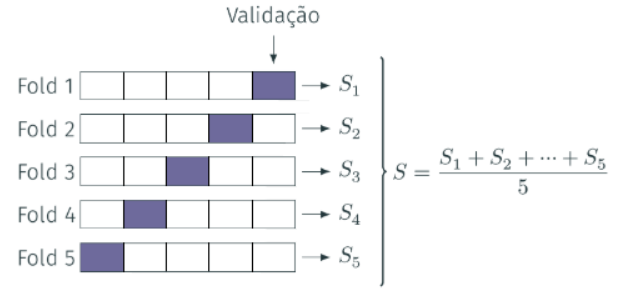

## Acurácia

A acurácia é uma forma de avaliação do desempenho de um modelo de classificação, baseado no número de acertos do modelo sobre seu total.

$Acurácia = \frac{acertos}{total}$

Usualmente é performada nos dados de treino e de teste separadamente. 

Em modelos de classifação binária, em que só existem as classes 0 ou 1 (acerto/erro), é importante separar os tipos de erros e tipos de acerto do modelo. Existem 4 casos possíves:

* Verdadeiro Positivo (TP): Modelo prediz verdadeiro e é verdadeiro
* Verdadeiro Negativo (TN): Modelo prediz falso e é falso
* Falso Positivo (FP): Modelo prediz verdadeiro mas é falso
* Falso Negativo (FN): Modelo prediz negativo mas é positivo

Esses casos são geralmente dispostos em uma matriz de confusão, que mostra os tipos de classificação possíveis (figura abaixo)

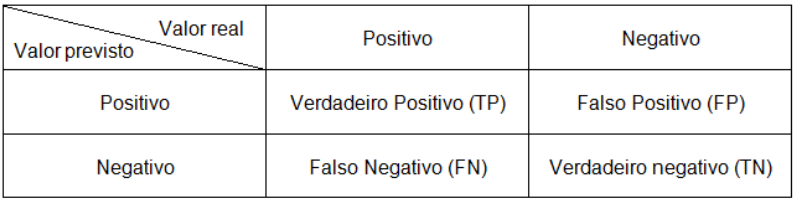

Com essa matriz, podemos expandir a compreensão da acurácia, reescrevendo:

$Acurácia = \frac{acertos}{total} =
 \frac{TP + TN}{TP + TN + FP + FN} $

## Precisão - Precision

Considerando o que foi descrito para a acurácia, a medida de precisão é relacionada aos acertos do modelo ao classificar os dados como positivo.

Por estar olhando apenas para os exemplos classificados como positivos, e por estarmos interessados na medida de acertos, podemos calcular a precisão através da fórmula:

$ p = \frac{TP}{TP + FP} $

Ou seja, dos valores identificados como positivos, quantos eram de fato positivos?

Se não houverem falsos positivos

 $TP + FP = TP$ e

 $p=1$

Se somente houverem falsos positivos

$TP = 0$ e 

$p=0$

## Revocação - Recall

A revogação se trata da habilidade do modelo de identificar os exemplos positivos. Para isso, a fórmula leva em consideração os valores de TP e FN, que compõe todo o conjunto dos positivos, sejam eles corretamente classificados (TP) ou não identificados como positivos (FN).

Seu cálculo se dá pela fórmula:

$ r = \frac{TP}{TP + FN} $

Ou seja, de todos os valores positivos, quantos foram identificados?

Se não houverem falsos negativos, todos foram identificados

 $TP + FP = TP$ e

 $r=1$

Se nenhum real positivo for identificado, todos os positivos caem no campo de falso negativo, portanto

$TP = 0$ e 

$r=0$

## F1

A medida de F1 se trata de uma média harmônica entre a revogação e a precisão. Seu valor varia entre 0 (ruim) e 1 (ótimo).

Seu valor pode ser obtido por:

$F_{1} = \frac{2pr}{p + r} $


Um bom desempenho de F1 depende tanto de uma boa precisão quanto de uma boa revogação, uma vez que se um deles for muito baixo, F1 será também baixo.

## Curva ROC

A curva ROC (Receiver Operating Characteristic) é uma curva composta pelo plot da taxa de verdadeiros positivos (TPR - True Positive Rate / Recall) $versus$ a taxa de falsos positivos (FPR - False Positive Rate).

$TPR = \frac{TP}{TP+FN}$ - explicada em Recall

$FPR = \frac{FP}{FP+TN}$ - Proporção de negativos que foram classificados como positivos sobre o total de negativos

Muitos modelos de classificação binária geram em suas saídas um número a partir do qual se compara com um limite/divisória, e se considera como verdadeiro ou falso se o valor obtido for maior ou menor que esse limite.

A curva ROC é obtida ao plotar o TPR $versus$ FPR variando o limite de separação de classes. 

Essa ideia, apesar de parecer estranha, é importante quando estamos tratando de dados sensíveis, como por exemplo, classificar pacientes suspeitos de estarem com COVID entre infectados e não infectados. É mais importante que o modelo seja capaz de classificar corretamente todos os infectados, e sugerir o isolamento, mesmo que isso aumente o número de falsos positivos, já que uma pessoa não doente se isolar oferece menor risco social que uma pessoa doente classificada como não doente. E para "enviesar" essa classificação dos dados, o limite adotado pelo modelo pode ser variado.

Ao variar os limites de decisão do modelo, são geradas novas matrizes de confusão. Ao invés de analisar várias dessas matrizes, a curva ROC seve como um resumo dos valores obtidos.

### AUC

AUC (Area Under -ROC- Curve). Juntamente à Curva ROC, o conceito de AUC utilizado para compreender a habilidade do modelo de classificar corretamente os dados. 

É a área sob a curva ROC, utilizada para comparar diferentes curvas ROC. As curvas que apresentarem a maior área sob o gráfico, indicam melhor performance do modelo. Então, calculando a AUC para dois modelos, por exemplo, Naive Bayes e NN, podemos ver qual obteve melhor desempenho para aquele conjunto de dados.

# Naive Bayes

**Tarefa: Apenas um experimento para servir de baseline**

O Naive Bayes é utilizado como um classificador, na qual a escolha da classe se baseia na probabilidade condicional de ocorrência de um evento, considerando independência dos eventos, ou seja, assume que não há correlação entre os atributos escolhidos, e por isso é chamado de "Naive", ingênuo. O termo "Bayes" vêm do Teorema de Bayes, no qual o algoritmo se baseia. É um algoritmo simples, com desempenho geralmente bom, mas não ótimo para diversas aplicações.

A probabilidade condicional de um evento A ocorrer é a probabilidade de ocorrência de A, dado que um outro evento B já ocorreu. 

Essa probabilidade é escrita na forma: 

$ p(A|B) $

O Teorema de Bayes para n elementos pode ser escrito na sua forma expandida:

$P(y|x1, x2, ... xn) $ = $\frac{P(y)*P(x1, x2, ... xn|y)} {P(x1, x2, ... xn)} $

Pelo fato do algoritmo assumir que os atributos são independentes entre si, a probabilidade de $xi$ dado $y$ não interefere no valor das demais variáveis e.g. $P(x(i+1)|y)$. E, como as entradas do algoritmo $(x1, x2 ... xn)$ são constantes, o teorema fica resumido a:

$P(y|x1,x2...xn)$ <math xmlns="http://www.w3.org/1998/Math/MathML"> <mstyle displaystyle="true"> <mi> &#x03B1;<!--greek small letter beta--> </mi> </mstyle> </math> $P(y) * \prod_{i=1}^n P(xi|y)$

Dessa forma, o algortimo do Naive Bayes selecionará o y (classe) para a qual a probabilidade de y dado os valores de X, é maximizado, ou seja:

$ŷ = argmax_{y} P(y) * \prod_{i=1}^n P(xi|y) $

Ao olharmos para os nossos dados, vemos que os atributos são compostos por dados contínuos, e não discretos. Dessa forma, é adequado utilizar o algoritmo "Gaussian Naive Bayes", já implementado na biblioteca do SciKit Learn. Vamos importá-lo abaixo

Para esse algoritmo, $P(xi|y)$ é dada com auxílio de uma normalização dos dados, na forma: 

$P(xi|y)$ = $ \frac{1}{\sqrt{2πσ^2_{y}}}$ * $exp(- \frac{(xi - μ_{y})^2} {2σ^2_{y}}) $

Nesse contexto, a média $μ_{y}$ e o desvio padrão ${σ_{y}}$ são dados pelo valor médio e desvio padrão de $xi$ dada as observações de $y$. 



### Implementação

In [23]:
from sklearn.naive_bayes import GaussianNB

test_size = 0.35 nos indica que vamos separar 35% dos dados para teste e manter 65% para treino

cv=5 é o número de folds para a cross validation

In [24]:
x_train, x_test, y_train, y_test = train_test_split(X_minmax, Y, 
                                      test_size=test_size, random_state=seed)

classifier_gnb = GaussianNB()

## Validação Cruzada

Utilizando o K-fold para validação cruzada, obtém-se o valor abaixo

In [25]:
classifier_gnb = GaussianNB()

In [26]:
cv_nb = cross_val_score(classifier_gnb, x_train, y_train, cv=k_fold).mean() #pega a média dos valores obtidos
print("Acurácia do Gaussian Naive Bayes para validação cruzada com K-fold = 5: {:.2f} %"
        .format(cv_nb*100))

Acurácia do Gaussian Naive Bayes para validação cruzada com K-fold = 5: 91.72 %


Ajustando o modelo

In [27]:
classifier_gnb.fit(x_train,y_train)

GaussianNB()

Desempenho nos dados de treino

In [28]:
treino_nb = classifier_gnb.score(x_train,y_train)

print("Acurácia do Gaussian Naive Bayes nos dados de treino: {:.2f} %"
        .format(treino_nb*100))

Acurácia do Gaussian Naive Bayes nos dados de treino: 91.42 %


Desempenho nos dados de teste

In [29]:
teste_nb = classifier_gnb.score(x_test,y_test)

print("Acurácia do Gaussian Naive Bayes nos dados de teste: {:.2f} %"
        .format(teste_nb*100))

Acurácia do Gaussian Naive Bayes nos dados de teste: 91.21 %


Predições para construção da matriz de confusão

In [30]:
y_pred = classifier_gnb.predict(x_test)
y_pred

array(['CONFIRMED', 'FALSE POSITIVE', 'CONFIRMED', ..., 'CONFIRMED',
       'FALSE POSITIVE', 'FALSE POSITIVE'], dtype='<U14')

Matriz de Confusão

In [31]:
cm = confusion_matrix(y_test, y_pred)
print("TP: {}".format(cm[0][0]))
print("FN: {}".format(cm[0][1]))
print("FP: {}".format(cm[1][0]))
print("TN: {}".format(cm[1][1]))

TP: 703
FN: 20
FP: 140
TN: 958


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


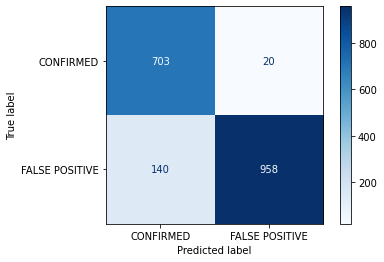

In [32]:
plot_confusion_matrix(classifier_gnb,x_test,y_test,cmap=plt.cm.Blues,values_format = 'd')

In [33]:
recall_nb = sk.metrics.recall_score(y_test, y_pred, average="binary", pos_label="CONFIRMED")
precision_nb = sk.metrics.precision_score(y_test, y_pred, average="binary", pos_label="CONFIRMED")

print("Foi obtida uma revogação = {:.2f} % e precisão = {:.2f} %".format(recall_nb*100, precision_nb*100))

Foi obtida uma revogação = 97.23 % e precisão = 83.39 %


Área sob a curva ROC 97.56%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


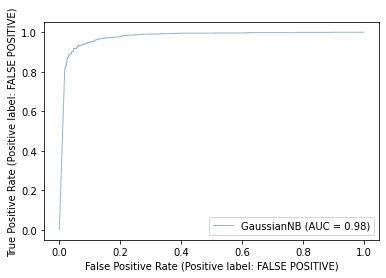

In [34]:
viz = plot_roc_curve(classifier_gnb, x_test, y_test, alpha=0.5, lw=1)
AUC_nb = viz.roc_auc
print("Área sob a curva ROC {:.2f}%".format(AUC_nb*100))

### Conclusões

Através dos valores plotados, pode-se observar alguns pontos

* Os valores de acurácia obtidos na validação cruzada e nos dados de treino tiveram valores muito similares para todas as proporções de treino/teste.


Acurácia do Gaussian Naive Bayes para validação cruzada com K-fold = 5: 91.72 %

Acurácia do Gaussian Naive Bayes nos dados de treino: 91.42 %

Acurácia do Gaussian Naive Bayes nos dados de teste: 91.21 %

Foi obtida uma revogação = 97.23 % e precisão = 83.39 %

Área sob a curva ROC 97.56%






# Decision Tree

**Tarefa: Variar a altura maxima da arvore (incluindo permitir altura ilimitada) e
mostrar os resultados graficamente**

Árvores de decisão são algoritmos de aprendizado de máquina supervisionado que progressivamente diminuem o dataset em grupos menores baseados em algum atributo, idealmente, até que seja possível classificar esses conjuntos por rótulos.

São utilizados tanto em problemas de classificação quanto de regressão. São denominadas árvores de classificação quando os dados das variáveis dependentes são categóricos (discretos, qualitativos) e árvores de regressão quando as variáveis dependentes são contínuas (numéricas, quantitativa).

Árvores são compostas por nós, galhos e folhas. Os nós são onde estão alocados os atributos. Os galhos são gerados a partir dos nós, separando os exemplos em função de um treshold ou classe do atributo. As folhas são as saídas do algoritmo, que serão por exemplo classificados. A partir de uma folha não são gerados nós.

A partir de cada nó, os dados são divididos de forma a aumentar a homogeneidade, ou seja, de forma a gerar grupos de dados de cada vez menos classes misturadas. 

Para esse exercício, por se tratar de uma tarefa de classificação, será utilizado um algoritmo baseado no conceito de ganho de informação para a construção da árvore. O ganho de informação é dado pela diminuição da entropia esperada ao utilizar um dado atributo. Os valores de entropia, ganho de informação e Taxa de Ganho podem ser calculados conforme abaixo

A complexidade ou capacidade do modelo aumenta a medida que a altura da árvore aumenta. No processo de aprendizagem é importante balancear de forma que tenha atributos e nós suficientes para classificar os dados (evitar underfitting) mas sem tornar a árvore específica/complexa demais, perdendo habilidade de generalização (evitar overfitting). 

Um procedimento utilizado para evitar overfitting é chamado de *Pruning*. É uma técnica que reduz a complexidade do modelo para ganhar desempenho nos dados de treino, através da remoção de nós que estão sendo utilizados para classificar ruídos. São separados por:

* Pré-pruning: Encerra o crescimento da árvore antecipadamente.

* Post-pruning: Permite o crescimento completo da árvore, então remove folhas se essa remoção resultar em aumento da performance.



Um Algoritmo comumente usado é o ID3 (Interative Dichotomiser), baseado no ganho de inofrmação, que segue:

A priori

$ Info_{D} = - \sum_{i=1}^m{\log_{2}pi} $ 

Entropia esperada ao utilizar um determinado atributo

$ {Info_{A}(D)} = - \sum_{i=1}^v{\frac {|D|_{j}}{|D|}} * InfoD_{j}$

Ganho de informação do atributo

$Ganho de informação(A) = Info(d) - Info_{A}(D) $

Onde Info(D) é a média de informação necessária para identificar a classe em D.

$\frac {|D|_{j}}{|D|} $ serve de peso para a $j-ésima$ partição

$Info(D)$ é a a informação esperada que seja necessária para identificar a classe em D utilizando A em um nó.


O algoritmo C4.5 é uma evoluação do ID3. Seu procedimento de separação se dá por:

$ {SplitInfo_{A}(D)} = - \sum_{i=1}^v{\frac {|D|_{j}}{|D|}} $ * $log_{2} {(\frac {|D|_{j}}{|D|})} $


onde $\frac {|D|_{j}}{|D|} $ serve de peso para a $j-ésima$ partição

$v$ é o número de atributos

O Ganho de informação é dado por

$ Razão de Ganho $ = $ \frac {Ganho(A)}{SplitInfo_{A}(D)}  $

## Implementação

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [36]:
#Separa os dados
x_train, x_test, y_train, y_test = train_test_split(X_minmax, Y, 
                                      test_size=test_size, random_state=seed)

In [37]:
10 % 5 == 0

True

## Funções Auxiliares

In [38]:
def validacao_cruzada_variando_alturas(x, y, alturas, cv=5, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in alturas:
        tree_model = DecisionTreeClassifier(max_depth=depth, criterion="entropy")
        cv_scores = cross_val_score(tree_model, x, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(x, y).score(x, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores
  
# function for plotting cross-validation results
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(16,9))
    ax.plot(depths, cv_scores_mean, '-o', label='Acurácia média da Validação Cruzada', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2) #2 desvios padrões
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='Acurácia de Treino', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Altura da Árvore', fontsize=14)
    ax.set_ylabel('Acurácia', fontsize=14)
    #ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.grid()
    ax.legend()

### Altura Ilimitada

Cria o modelo

In [39]:
# cria o modelo
tree_clf = DecisionTreeClassifier(criterion="entropy", random_state=seed) #não foi passada altura máxima
#tambem nao foi passada o minimo de amostras para gerar uma folha
#tambem nao foi passado o numero máximo de atributos a serem usados

# Ajusta aos dados
tree_clf = tree_clf.fit(x_train,y_train)

#Prediz os dados de teste
y_pred = tree_clf.predict(x_test)

Retorna a acurácia

In [40]:
print("Acurácia da Árvore de Decisão nos dados de treino: {:.2f} %"
        .format(tree_clf.score(x_train,y_train)*100))

Acurácia da Árvore de Decisão nos dados de treino: 100.00 %


In [41]:
print("Acurácia da Árvore de Decisão nos dados de teste: {:.2f} %"
        .format(tree_clf.score(x_test,y_test)*100))


Acurácia da Árvore de Decisão nos dados de teste: 95.33 %


Plotando a árvore sem restrições de altura ou atributo. Nota-se uma árvore complexa, de difícil compreensão. Tentaremos simplificá-la nos próximos experimentos.

Para conseguir ler os itens é necessário clicar na imagem

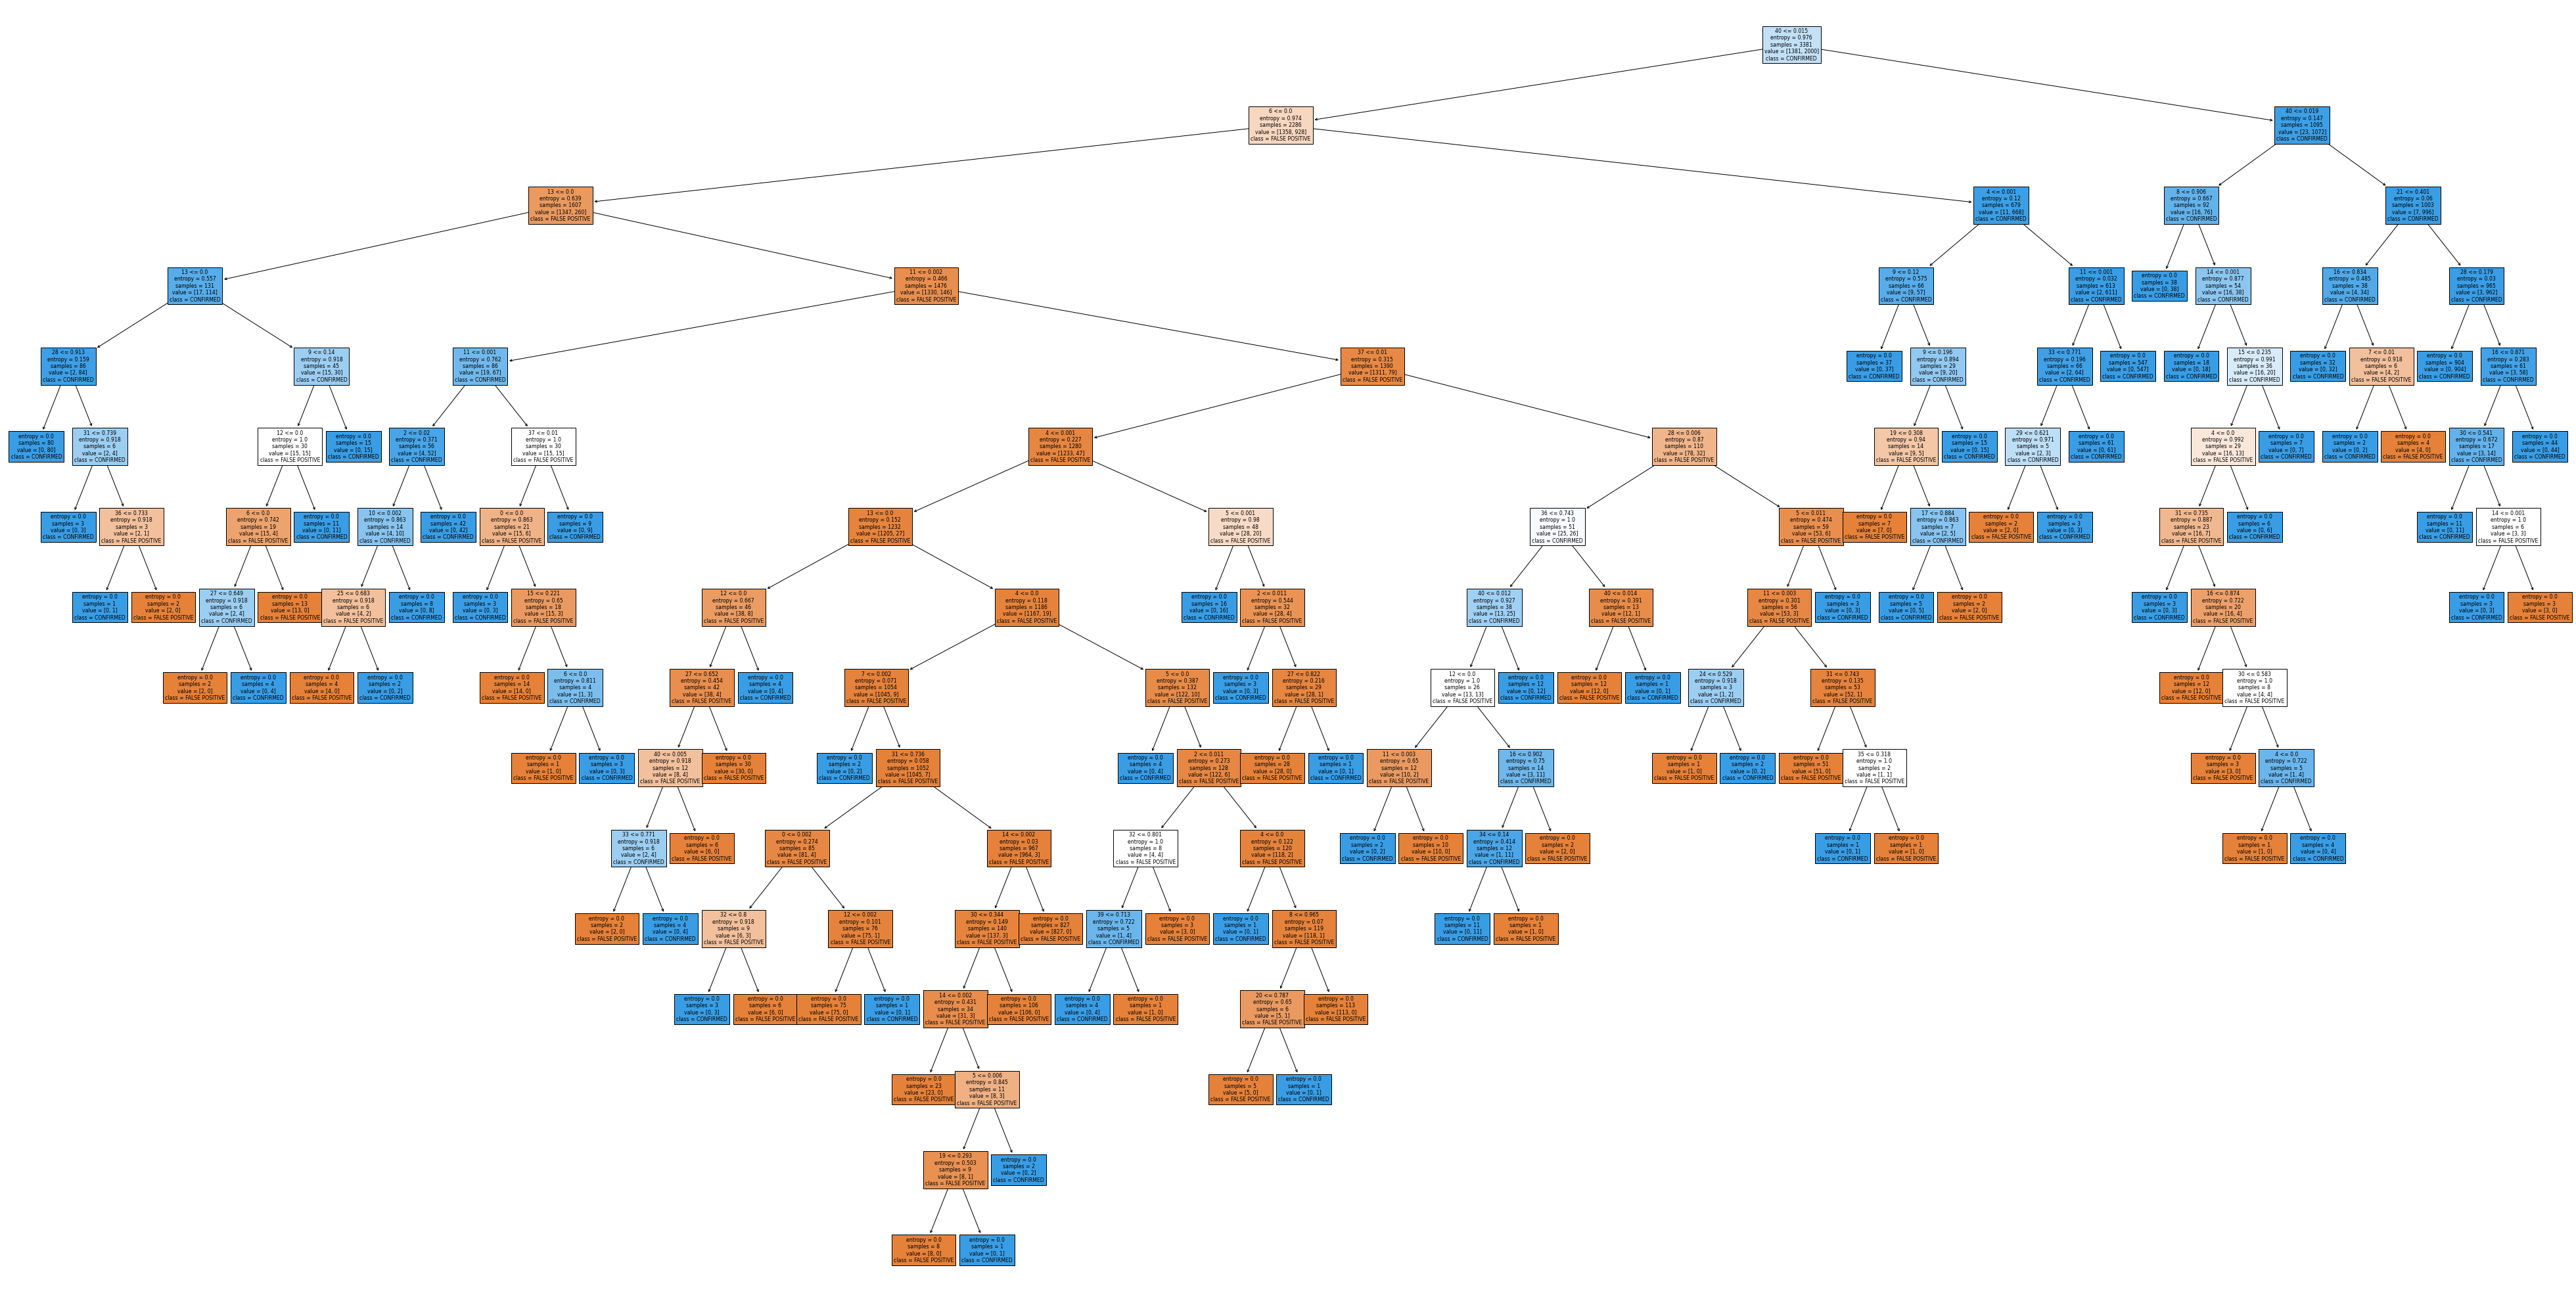

In [42]:
fig = plt.figure(figsize=(70,36))
_ = tree.plot_tree(tree_clf, 
                   feature_names=x_train.columns,  
                   class_names=y_train.unique(),
                   filled=True)

### Variando alturas

Variar a altura da árvore aumenta/diminui a complexidade do modelo, premitando que o modelo se especialize numa tarefa. No entanto é necessário avaliar se não está provocando overfitting.

Árvore de decisão com altura máxima = 1
Acurácia da Árvore de Decisão nos dados de treino com altura 1: 71.87 %
Acurácia da Árvore de Decisão nos dados de teste com altura 1: 70.46 %
Árvore de decisão com altura máxima = 2
Acurácia da Árvore de Decisão nos dados de treino com altura 2: 91.30 %
Acurácia da Árvore de Decisão nos dados de teste com altura 2: 90.55 %
Árvore de decisão com altura máxima = 3
Acurácia da Árvore de Decisão nos dados de treino com altura 3: 94.17 %
Acurácia da Árvore de Decisão nos dados de teste com altura 3: 93.52 %
Árvore de decisão com altura máxima = 4
Acurácia da Árvore de Decisão nos dados de treino com altura 4: 95.65 %
Acurácia da Árvore de Decisão nos dados de teste com altura 4: 94.89 %
Árvore de decisão com altura máxima = 5
Acurácia da Árvore de Decisão nos dados de treino com altura 5: 95.92 %
Acurácia da Árvore de Decisão nos dados de teste com altura 5: 94.45 %
Árvore de decisão com altura máxima = 6
Acurácia da Árvore de Decisão nos dados de tr

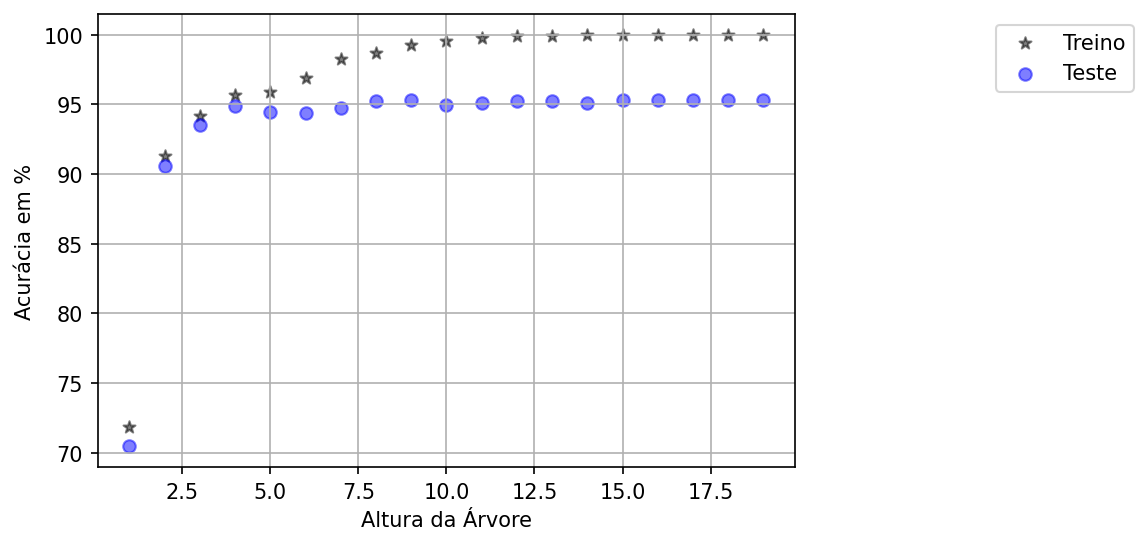

In [43]:
plt.figure(dpi=150)
labels = ["Treino", "Teste"]
markers = ["*","o"]
colours = ["k","b"]

for altura in range(1,20,1):
  print(f"Árvore de decisão com altura máxima = {altura}")

  # cria o modelo
  tree_clf = DecisionTreeClassifier(criterion="entropy", random_state=seed, max_depth=altura)
  #tambem nao foi passada o minimo de amostras para gerar uma folha
  #tambem nao foi passado o numero máximo de atributos a serem usados

  # Ajusta aos dados
  tree_clf = tree_clf.fit(x_train,y_train)

  #Prediz os dados de teste
  #y_pred = tree_clf.predict(x_test)
  treino = tree_clf.score(x_train,y_train)
  print("Acurácia da Árvore de Decisão nos dados de treino com altura {}: {:.2f} %"
          .format(altura, treino*100))
  teste = tree_clf.score(x_test,y_test)
  print("Acurácia da Árvore de Decisão nos dados de teste com altura {}: {:.2f} %"
          .format(altura, teste*100))
  

  plt.scatter(altura, treino*100 ,marker=markers[0], color=colours[0], alpha=0.5,label=labels[0])
  plt.scatter(altura, teste*100 , c=colours[1], alpha=0.5, marker=markers[1], label=labels[1])
  
plt.grid()
plt.legend(labels, loc='best', bbox_to_anchor=(1, 0.5, 0.5, 0.5))
#plt.xticks(np.arange(0, 100, step=10)) 
plt.xlabel("Altura da Árvore")
plt.ylabel("Acurácia em %")
plt.show()

### Validação Cruzada

In [44]:
# Variando alturas de 1 a 20
altura = range(1,20)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = validacao_cruzada_variando_alturas(x_train, y_train, altura)

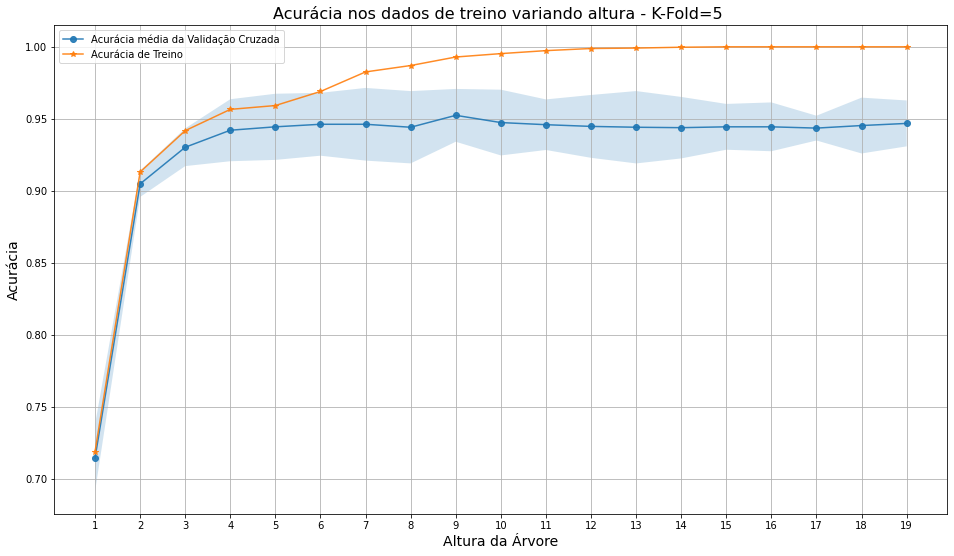

In [45]:
# plotting accuracy
plot_cross_validation_on_trees(altura, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Acurácia nos dados de treino variando altura - K-Fold=5 ')

In [46]:
idx_max = sm_cv_scores_mean.argmax()
sm_best_tree_depth = altura[idx_max]
sm_best_tree_cv_score = sm_cv_scores_mean[idx_max]
sm_best_tree_cv_score_std = sm_cv_scores_std[idx_max]
print('A Árvore de altura {} atingiu a melhor acurácia média na validação cruzada (K-Fold=5): {} +/- {}% nos dados de treino'.format(
      sm_best_tree_depth, round(sm_best_tree_cv_score*100,5), round(sm_best_tree_cv_score_std*100, 5)))


A Árvore de altura 9 atingiu a melhor acurácia média na validação cruzada (K-Fold=5): 95.2383 +/- 0.91735% nos dados de treino


### A Árvore Final

Utilizando a altura obtida pela validação cruzada, vamos construir a árvore com altura=5, uma vez que para um número maior da altura, a acurácia de treino descola para além de dois desvios padrões da validação cruzada, sugerindo overfitting.

In [47]:
altura = 5
Dtree_clf = DecisionTreeClassifier(criterion="entropy", random_state=seed, max_depth=altura)


cv_dt = cross_val_score(Dtree_clf, x_train, y_train, cv=k_fold, scoring="accuracy").mean()
print("Acurácia da Árvore de Decisão na validação cruzada com altura {}: {:.2f} %"
        .format(altura, cv_dt*100))

# Ajusta aos dados
Dtree_clf = Dtree_clf.fit(x_train,y_train)


#Prediz os dados de teste
y_pred = Dtree_clf.predict(x_test)
treino_dt = Dtree_clf.score(x_train,y_train)
print("Acurácia da Árvore de Decisão nos dados de treino com altura {}: {:.2f} %"
        .format(altura, treino_dt*100))
teste_dt = Dtree_clf.score(x_test,y_test)
print("Acurácia da Árvore de Decisão nos dados de teste com altura {}: {:.2f} %"
        .format(altura, teste_dt*100))



Acurácia da Árvore de Decisão na validação cruzada com altura 5: 94.59 %
Acurácia da Árvore de Decisão nos dados de treino com altura 5: 95.92 %
Acurácia da Árvore de Decisão nos dados de teste com altura 5: 94.45 %


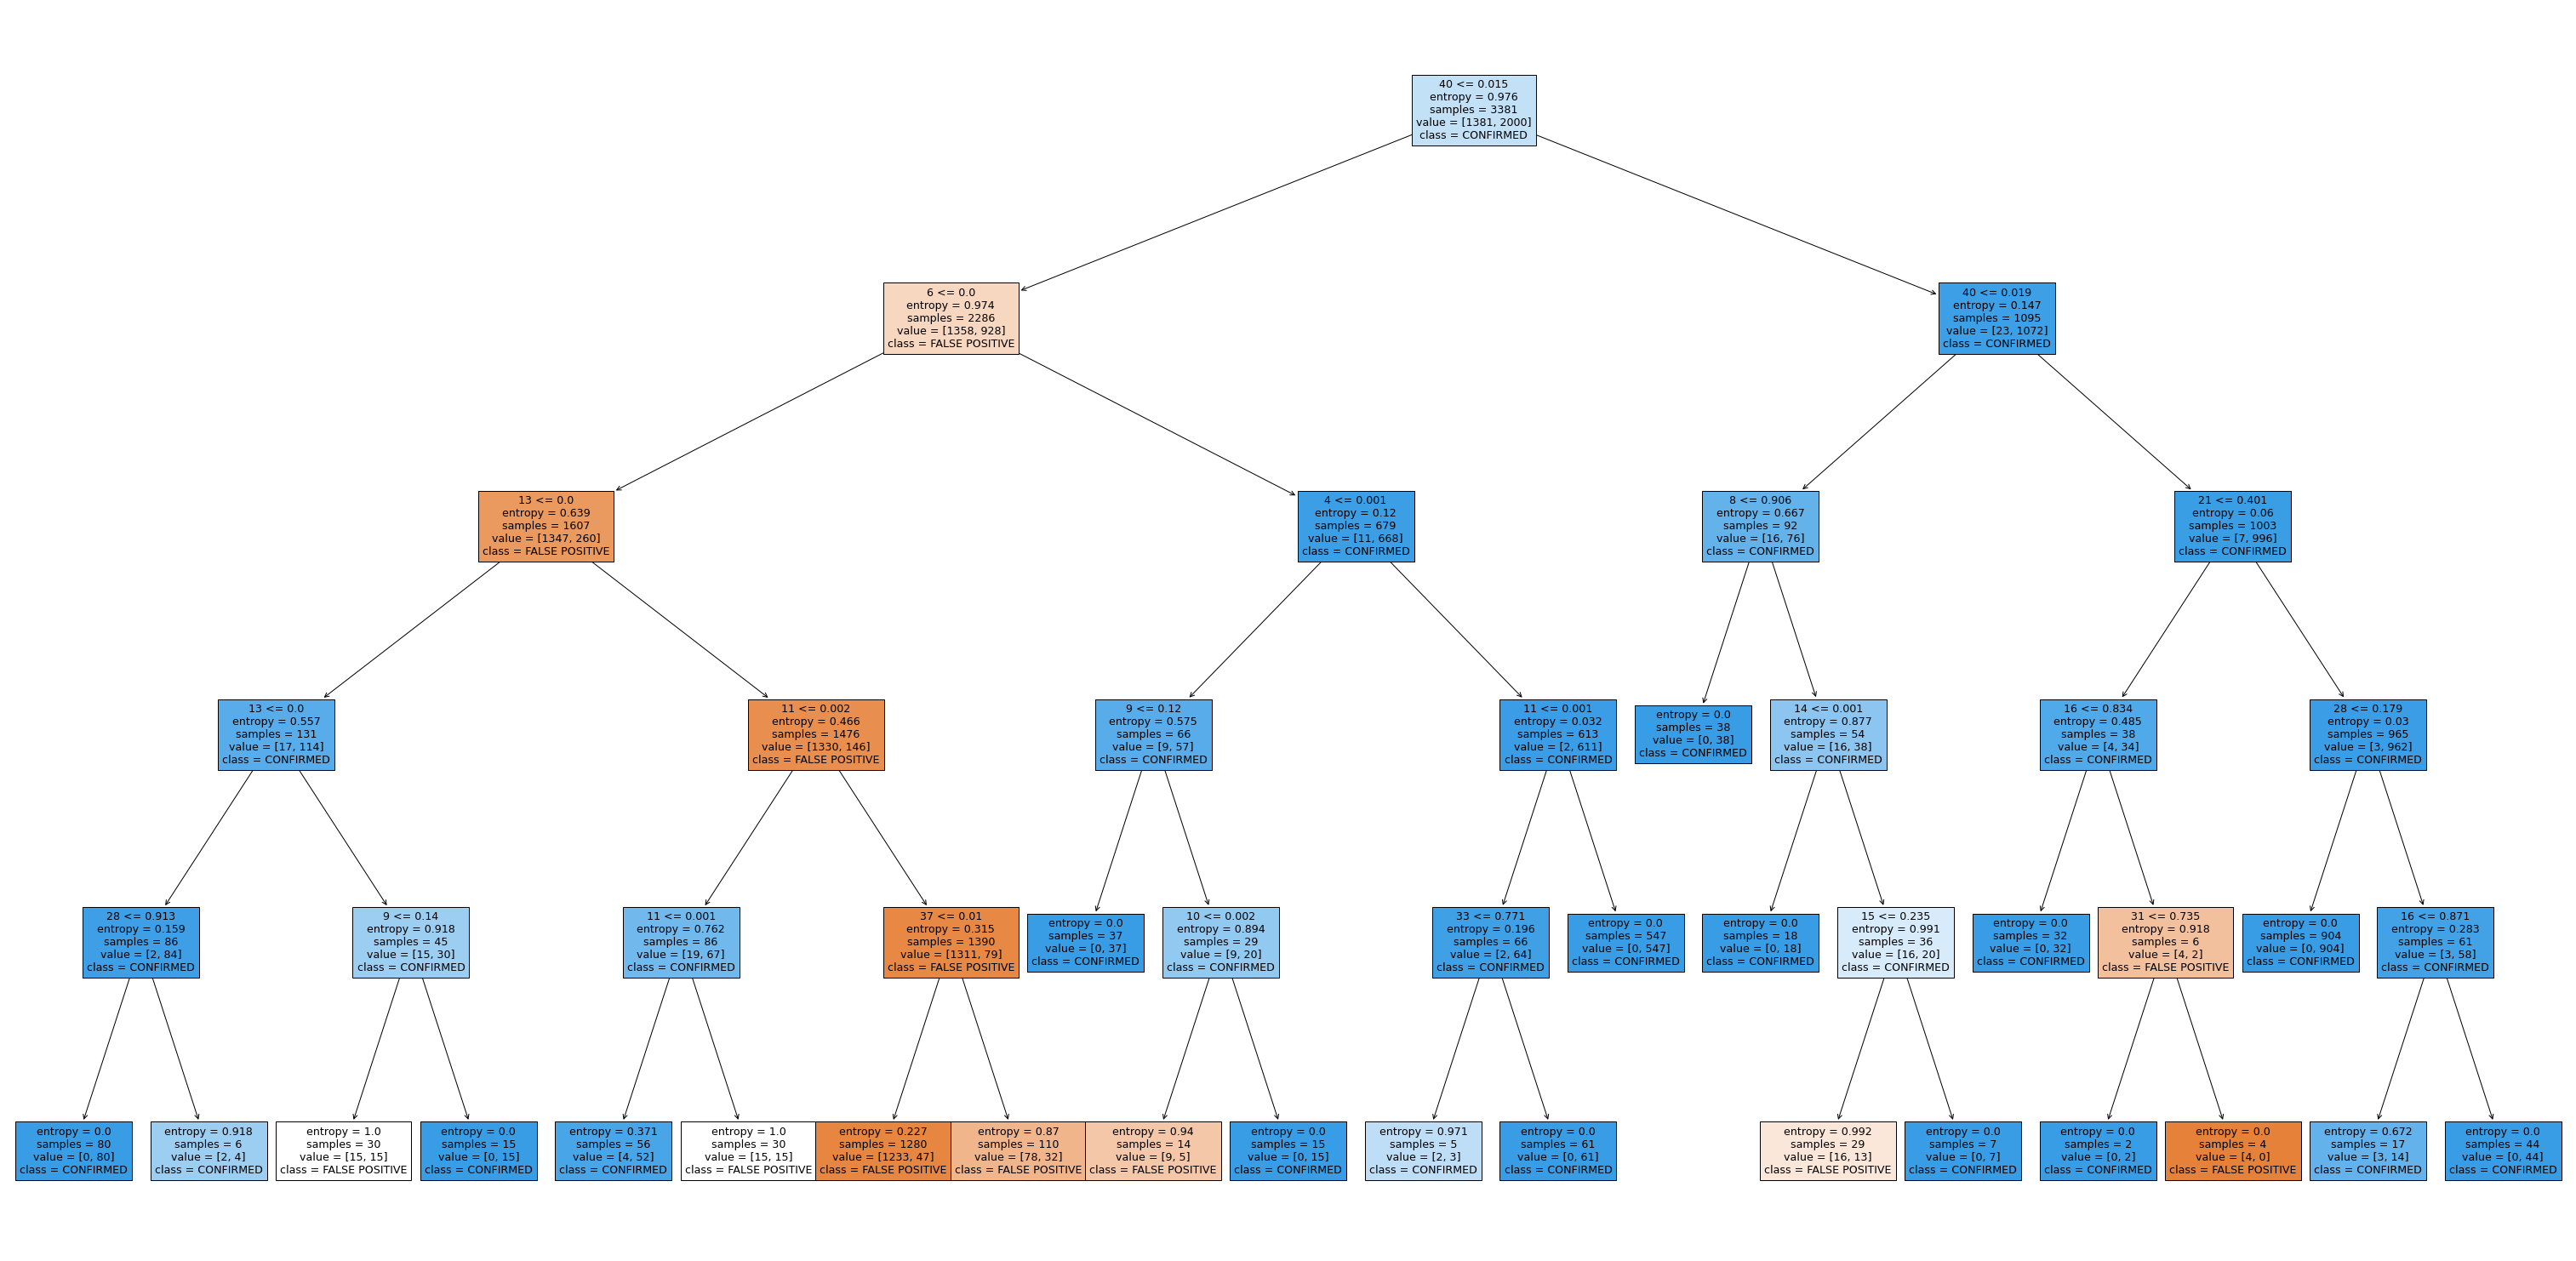

In [48]:
fig = plt.figure(figsize=(54,27))
_ = tree.plot_tree(Dtree_clf, 
                   feature_names=x_train.columns,  
                   class_names=y_train.unique(),
                   filled=True)

Matriz de confusão da Árvore de Decisão com altura igual a 5

In [49]:
cm = confusion_matrix(y_test, y_pred)
print("TP: {}".format(cm[0][0]))
print("FN: {}".format(cm[0][1]))
print("FP: {}".format(cm[1][0]))
print("TN: {}".format(cm[1][1]))

TP: 708
FN: 15
FP: 86
TN: 1012


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


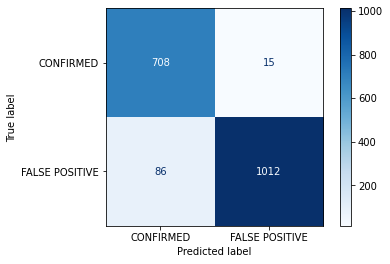

In [50]:
plot_confusion_matrix(Dtree_clf, x_test, y_test, cmap=plt.cm.Blues, values_format = 'd')

Precision e Recall

In [51]:
recall_dt = sk.metrics.recall_score(y_test, y_pred, average="binary", pos_label="CONFIRMED")
precision_dt = sk.metrics.precision_score(y_test, y_pred, average="binary", pos_label="CONFIRMED")

print("Foi obtida uma revogação = {:.2f} % e precisão = {:.2f} %".format(recall_dt*100, precision_dt*100))

Foi obtida uma revogação = 97.93 % e precisão = 89.17 %


Curva ROC e AUC da Árvore de Decisão com altura igual a 5

Área sob a curva ROC 96.86%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


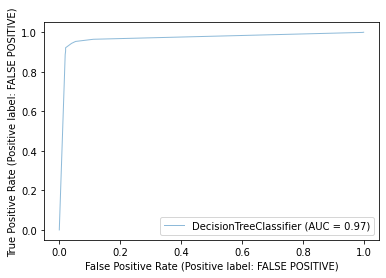

In [52]:
viz = plot_roc_curve(Dtree_clf, x_test, y_test, alpha=0.5, lw=1)
AUC_dt = viz.roc_auc
print("Área sob a curva ROC {:.2f}%".format(AUC_dt*100))

## Conclusões

* Hiperparâmetros
Para esse problema, pode-se variar a altura da árvore para encontrar um ponto ótimo que não cause sobajuste nem sobre ajuste. Esse parâmetro foi avaliado observando a variação na acurácia de treino e teste e a validação cruzada com K-Fold=5.

* Altura
Através da validação cruzada, foi escolhida a árvore com altura igual a 5. Com altura superior a 5, a acurácia de treino continua melhorando, até que numa altura de 15, atinge 100% de acurácia. No entanto, as acurácias de validação e de teste não apresentam esse crescimento contínuo, estagnando em torno de 95%. Isso pode indicar overfitting para árvores com altura superior a 5. 

Acurácia da Árvore de Decisão na validação cruzada com altura 5: 94.59 %

Acurácia da Árvore de Decisão nos dados de treino com altura 5: 95.92 %

Acurácia da Árvore de Decisão nos dados de teste com altura 5: 94.45 %

* Além disso, foi obtida uma revogação = 97.93 % e precisão = 89.17 % e Área sob a curva ROC 96.86%


# SVM

Avaliar os kernels linear, sigmoid, polinomial e RBF

Support Vector Machines são algoritmos que buscam encontrar o hiperplano ótimo num espaço N-dimensional (N atributos) que separe os dados com a maior margem possível. Essa margem é contruída com base nos pontos mais próximos à fronteira de decisão (vetores suporte), igualmente distante dos pontos de cada classe. A Margem pode ser buscada admitindo diferentes níveis erro, sendo o tamanho da margem e o erro admitido parâmetros que são calibrados por um hiperparâmetro.

O hiperplano de margem ótima incialmente seria capaz de separar apenas dados linearmente separáveis, no entanto, ao utilizar-se do "Truque do Kernel", os dados são virtualmente (não explicitamente) deslocados para que se tornem linearmente separáveis. O algoritmo resultante é é formalmente similar, no entanto utilizando uma função kernel não linear que transforma os dados e os torna linearmente separáveis.

Alguns kernels classicamente utilizados são: linear, sigmoid, polinomial e RBF

A função de perda que permite a maximização da margem é chamada *Hinge Loss*:

$c(x,y,f(x)) = (1 - y * f(x)) $

O custo é zero se o valor previsto e o esperado são os mesmos, e somente difere de zero se os valores não forem iguais. O parâmetro de regularização é responsável pelo *trade-off* entre a maximização da margem e a diminuição do erro. Com o fator de regularização, a Loss toma o formato:

$ min_{w}λ ||w||^2 + \sum_{i=1}^n(1-y_{i}<x_{i},w>)    $

A atualização dos parâmetros é dada pelos gradientes,dados pela derivada parcial da loss com respeito aos pesos. Quando a classe predita difere da esperada, a atualização dos pesos se dá por:

$w = w + α(y_{i} x_{i} - 2 λ w)  $

Quando a classe predita é a mesma da esperada, a atualização dos pesos se resume a:

$w = w - α(2 λ w)  $

## Implementação

In [53]:
from sklearn.svm import SVC

Por default, o sklearn svm.SVC utiliza o parâmetro de regularização = 1. Podemos variar esse valor para obter margens mais rígidas (menos erros) ou permitir uma margem "soft" que permita mais erros e expanda seu tamanho.

O kernel default é rbf. vamos inicialmente testar um kernel linear.

O parâetro max_iter limita o número de iterações. Pode ser necessário uma vez que o tempo de execução aumenta quadraticamente com o número de amostras e pode ser impraticavel com alguns milhares de exemplos

In [54]:
from sklearn.preprocessing import normalize
from sklearn.preprocessing import MinMaxScaler

apply:  mapear o target 0 e 1
df['koi_disposition'] = df['koi_disposition'].apply(lambda v: 1 if v == 'CONFIRMED' else 0)

In [55]:
#vamos separar 35/65 os dados de treino e teste
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                      test_size=test_size, random_state=seed)

In [56]:
svc_clf = SVC(C=1,kernel='linear',max_iter=10000,random_state=seed)
svc_clf.fit(x_train,y_train)
y_pred = svc_clf.predict(x_test)

print("Acurácia obtida para kernel linear = {:.3f}".format(accuracy_score(y_test,y_pred)))

Acurácia obtida para kernel linear = 0.459


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


In [57]:
svc_clf = SVC(C=1,kernel='sigmoid',max_iter=10000,random_state=seed)
svc_clf.fit(x_train,y_train)
y_pred = svc_clf.predict(x_test)

print("Acurácia obtida para kernel Sigmoid = {:.3f}".format(accuracy_score(y_test,y_pred)))

Acurácia obtida para kernel Sigmoid = 0.558


In [58]:
svc_clf = SVC(C=1,kernel='poly',max_iter=10000,random_state=seed)
svc_clf.fit(x_train,y_train)
y_pred = svc_clf.predict(x_test)

print("Acurácia obtida para kernel Poinomial = {:.3f}".format(accuracy_score(y_test,y_pred)))

Acurácia obtida para kernel Poinomial = 0.603


In [59]:
svc_clf = SVC(C=1,kernel='rbf',max_iter=10000,random_state=seed)
svc_clf.fit(x_train,y_train)
y_pred = svc_clf.predict(x_test)

print("Acurácia obtida para kernel RBF = {:.3f}".format(accuracy_score(y_test,y_pred)))

Acurácia obtida para kernel RBF = 0.675


## MinMax Scaler

Vamos melhorar o desempenho escalando os dados utilizando o MAXMIN Scaler

In [60]:
X

,koi_period,koi_impact,koi_duration,koi_depth,koi_ror,koi_srho,koi_prad,koi_sma,koi_incl,koi_teq,...,koi_fwm_srao,koi_fwm_sdeco,koi_fwm_prao,koi_fwm_pdeco,koi_dicco_mra,koi_dicco_mdec,koi_dicco_msky,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky
0,9.48804,0.146,2.95750,615.8,0.02234,3.20796,2.26,0.0853,89.66,793.0,...,0.430,0.940,-0.00020,-0.00055,-0.010,0.200,0.200,0.080,0.310,0.320
1,54.41838,0.586,4.50700,874.8,0.02795,3.02368,2.83,0.2734,89.57,443.0,...,-0.630,1.230,0.00066,-0.00105,0.390,0.000,0.390,0.490,0.120,0.500
2,1.73695,1.276,2.40641,8079.2,0.38739,0.22080,33.46,0.0267,67.09,1395.0,...,-0.111,0.002,0.00302,-0.00142,-0.249,0.147,0.289,-0.257,0.099,0.276
3,2.52559,0.701,1.65450,603.3,0.02406,1.98635,2.75,0.0374,85.41,1406.0,...,-0.010,0.230,0.00008,-0.00007,0.030,-0.090,0.100,0.070,0.020,0.070
4,7.36179,1.169,5.02200,233.7,0.18339,0.00485,39.21,0.0820,60.92,1342.0,...,-13.450,24.090,0.00303,-0.00555,-4.506,7.710,8.930,-4.537,7.713,8.948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5197,373.89398,0.963,27.66000,730.0,0.03288,0.00771,2.51,0.8885,88.57,206.0,...,-1.000,-0.300,0.00060,0.00030,2.360,-0.990,2.550,2.370,-0.910,2.540
5198,8.58987,0.765,4.80600,87.7,0.00936,0.18863,1.11,0.0779,85.14,929.0,...,1.100,1.200,-0.00008,-0.00010,1.260,-1.200,1.750,1.350,-1.300,1.840
5199,0.52770,1.252,3.22210,1579.2,0.29763,0.16318,29.35,0.0128,20.78,2088.0,...,0.792,-0.484,-0.00024,0.00018,2.132,-1.757,2.763,2.344,-1.756,2.929
5200,0.68140,0.147,0.86500,103.6,0.00944,8.97692,1.07,0.0157,88.60,2218.0,...,7.200,-5.600,-0.00072,0.00050,3.410,-3.650,5.000,3.380,-3.890,5.160


In [61]:
#X_norm = sk.preprocessing.normalize(X)
X_pre = X.values
min_max_scaler = sk.preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X_pre)
X_minmax = pd.DataFrame(X_scaled)
X_minmax

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,0.008573,0.001448,0.020608,0.000712,0.000211,0.003492,0.000011,0.038524,0.996124,0.072275,...,0.739274,0.802901,0.770674,0.137836,0.319887,0.735977,0.002257,0.337466,0.713451,0.003571
1,0.050528,0.005813,0.031801,0.001011,0.000267,0.003291,0.000014,0.131308,0.995097,0.036189,...,0.736435,0.803485,0.770840,0.137750,0.325841,0.734043,0.004402,0.343309,0.711688,0.005580
2,0.001335,0.012658,0.016627,0.009347,0.003866,0.000240,0.000167,0.009619,0.738798,0.134344,...,0.737825,0.801011,0.771295,0.137686,0.316329,0.735464,0.003262,0.332664,0.711494,0.003080
3,0.002072,0.006954,0.011196,0.000697,0.000228,0.002162,0.000013,0.014897,0.947668,0.135478,...,0.738095,0.801471,0.770728,0.137919,0.320482,0.733172,0.001129,0.337324,0.710761,0.000781
4,0.006588,0.011597,0.035521,0.000269,0.001823,0.000005,0.000195,0.036896,0.668453,0.128879,...,0.702100,0.849537,0.771297,0.136974,0.252962,0.808607,0.100790,0.271669,0.782124,0.099866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5197,0.348845,0.009553,0.199049,0.000844,0.000316,0.000008,0.000012,0.434716,0.983696,0.011754,...,0.735444,0.800403,0.770829,0.137983,0.355165,0.724468,0.028781,0.370101,0.702134,0.028348
5198,0.007734,0.007589,0.033961,0.000101,0.000081,0.000205,0.000005,0.034874,0.944590,0.086298,...,0.741068,0.803425,0.770697,0.137914,0.338791,0.722437,0.019752,0.355565,0.698516,0.020536
5199,0.000206,0.012420,0.022520,0.001826,0.002967,0.000178,0.000146,0.002762,0.210808,0.205794,...,0.740243,0.800032,0.770667,0.137962,0.351771,0.717050,0.031185,0.369731,0.694286,0.032690
5200,0.000350,0.001458,0.005493,0.000119,0.000082,0.009771,0.000005,0.004193,0.984038,0.219198,...,0.757405,0.789726,0.770574,0.138017,0.370795,0.698743,0.056433,0.384495,0.674490,0.057589


## Funções auxiliares

In [62]:
def svc_single(regularizadores,kernel,max_iter,X,Y):
  #vamos separar 35/65 os dados de treino e teste
  x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                        test_size=0.35, random_state=seed)
  accu_treino = []
  accu_test = []
  for C in regularizadores:
    svc_clf = SVC(C=C,kernel=kernel ,max_iter=max_iter,random_state=seed)
    svc_clf.fit(x_train,y_train)
    accu_treino.append(svc_clf.score(x_train,y_train))
    accu_test.append(svc_clf.score(x_test,y_test))
    #print("kernel{},C={},accuTreino={:.2f},AccuTest={:.2f}".format(kernel,C,svc_clf.score(x_train,y_train),svc_clf.score(x_test,y_test)))

  accu_treino = np.array(accu_treino)
  accu_test = np.array(accu_test)  
  idx_max = accu_treino.argmax()
  best_treino = accu_treino[idx_max]  
  best_test = accu_test[idx_max]
  best_C = regularizadores[idx_max]
  print("kernel{},C={},accuTreino={:.2f},AccuTest={:.2f}".format(kernel,best_C,best_treino,best_test))
  return best_treino, best_test, best_C, accu_treino, accu_test

In [63]:
def validacao_cruzada_variando_C(x_train, y_train, regularizadores,kernel,max_iter, cv=5, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for C in regularizadores:
        svm_c_model = SVC(C=C,kernel=kernel ,max_iter=max_iter,random_state=seed)
        cv_scores = cross_val_score(svm_c_model, x_train, y_train, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(svm_c_model.fit(x_train, y_train).score(x_train, y_train))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    idx_max = cv_scores_mean.argmax()
    best_CV = cv_scores_mean[idx_max]
    best_accu = accuracy_scores[idx_max]
    best_C = regularizadores[idx_max]
    print("Melhor CV = {:.3f} com acuracia de treino = {:.3f} com C={:.3f}".format(best_CV, best_accu,best_C))
    return cv_scores_mean, cv_scores_std, accuracy_scores

In [64]:
# function for plotting cross-validation results
def plot_cross_validation_on_svmc(C, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(16,9))
    ax.plot(C, cv_scores_mean*100, '-o', label='Acurácia média da Validação Cruzada', alpha=0.9)
    ax.fill_between(C, (cv_scores_mean-2*cv_scores_std)*100, (cv_scores_mean+2*cv_scores_std)*100, alpha=0.2) #2 desvios padrões
    ylim = plt.ylim()
    ax.plot(C, accuracy_scores*100, '-*', label='Acurácia de Treino', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel("Regularizador", fontsize=14)
    #ax.set_xlim(-100,1100)
    ax.set_ylabel('Acurácia %', fontsize=14)
    #ax.set_ylim(ylim)
    ax.set_xticks(C)
    ax.grid()
    ax.legend()

In [65]:
# function for plotting cross-validation results
def plot_log_cross_validation_on_svmc(C, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(16,9))
    ax.plot(np.log(C), cv_scores_mean*100, '-o', label='Acurácia média da Validação Cruzada', alpha=0.9)
    ax.fill_between(np.log(C), (cv_scores_mean-2*cv_scores_std)*100, (cv_scores_mean+2*cv_scores_std)*100, alpha=0.2) #2 desvios padrões
    ylim = plt.ylim()
    ax.plot(np.log(C), accuracy_scores*100, '-*', label='Acurácia de Treino', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel("Log do Regularizador", fontsize=14)
    #ax.set_xlim(-100,1100)
    ax.set_ylabel('Acurácia %', fontsize=14)
    #ax.set_ylim(ylim)
    ax.set_xticks(np.log(C))
    ax.grid()
    ax.legend()

## Regularizadores

In [66]:
regularizators = [0.1,1,5,10,20,50,80,100,200,400,800,1000]

## Kernel Linear

In [67]:
acuracia_treino, acuracia_teste, c,accu_treino, accu_test = svc_single(regularizators,"linear",100000,X_minmax,Y)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


kernellinear,C=1000,accuTreino=0.96,AccuTest=0.95


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


In [68]:
acuracia_treino, acuracia_teste, c

(0.9562259686483289, 0.9489291598023064, 1000)

### Validação Cruzada


Obtivemos uma acurácia bem superior, agora vamos obter a validação cruzada

In [69]:
x_train, x_test, y_train, y_test = train_test_split(X_minmax, Y, 
                                        test_size=test_size, random_state=seed)

In [70]:
svmc_cv_scores_mean, svmc_cv_scores_std, svmc_accuracy_scores = validacao_cruzada_variando_C(x_train, y_train, regularizators,'linear',100000, cv=5, scoring='accuracy')

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (ma

Melhor CV = 0.949 com acuracia de treino = 0.956 com C=1000.000


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


Melhor CV = 0.949 com acuracia de treino = 0.956 com C=1000.000

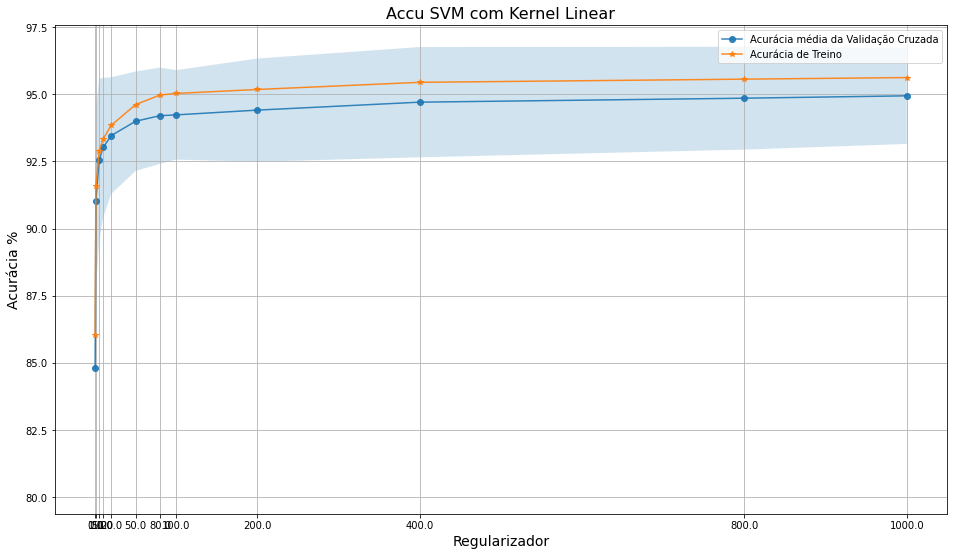

In [71]:
plot_cross_validation_on_svmc(regularizators, svmc_cv_scores_mean, svmc_cv_scores_std, svmc_accuracy_scores, 'Accu SVM com Kernel Linear')

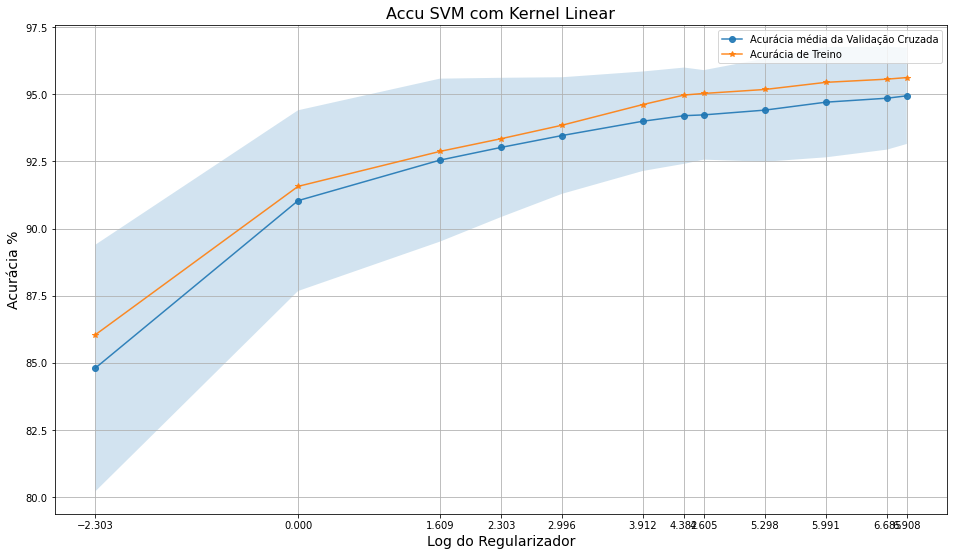

In [72]:
plot_log_cross_validation_on_svmc(regularizators, svmc_cv_scores_mean, svmc_cv_scores_std, svmc_accuracy_scores, 'Accu SVM com Kernel Linear')

### Precision e Recall



In [73]:
# cria o modelo
svmc_classifier_lin = SVC(C=1000, kernel="linear" , max_iter=100000, random_state=seed)

cv_svmc_lin = cross_val_score(svmc_classifier_lin, x_train, y_train, cv=k_fold, scoring="accuracy").mean()
print("Acurácia do SVC Linear na validação cruzada: {:.2f} %"
        .format(cv_svmc_lin*100))

# Ajusta aos dados
svmc_classifier_lin = svmc_classifier_lin.fit(x_train,y_train)

#Prediz os dados de teste
y_pred = svmc_classifier_lin.predict(x_test)

treino_svmc_lin = svmc_classifier_lin.score(x_train,y_train)
print("Acurácia do SVC Linear nos dados de treino: {:.2f} %"
        .format(treino_svmc_lin*100))

teste_svmc_lin = svmc_classifier_lin.score(x_test,y_test)
print("Acurácia do SVC Linear nos dados de teste: {:.2f} %"
        .format(teste_svmc_lin*100))

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (ma

Acurácia do SVC Linear na validação cruzada: 94.94 %
Acurácia do SVC Linear nos dados de treino: 95.62 %
Acurácia do SVC Linear nos dados de teste: 94.89 %


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


Considerando o SVC com C=1000 e limitado a 100k iterações, foram construídas a matriz de confusão e curva ROC abaixo, além das métricas de Precisão e Revogação.

In [74]:
cm = confusion_matrix(y_test, y_pred)
print("TP: {}".format(cm[0][0]))
print("FN: {}".format(cm[0][1]))
print("FP: {}".format(cm[1][0]))
print("TN: {}".format(cm[1][1]))

TP: 700
FN: 23
FP: 70
TN: 1028


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


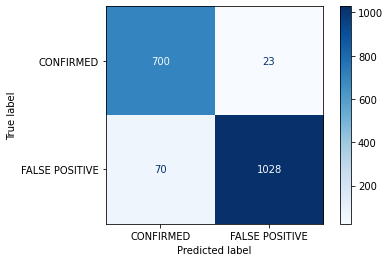

In [75]:
plot_confusion_matrix(svmc_classifier_lin, x_test, y_test, cmap=plt.cm.Blues, values_format = 'd')

In [76]:
recall_svmc_lin = sk.metrics.recall_score(y_test, y_pred, average="binary", pos_label="CONFIRMED")
precision_svmc_lin = sk.metrics.precision_score(y_test, y_pred, average="binary", pos_label="CONFIRMED")

print("Foi obtida uma revogação = {:.2f} % e precisão = {:.2f} %".format(recall_svmc_lin*100, precision_svmc_lin*100))

Foi obtida uma revogação = 96.82 % e precisão = 90.91 %


Área sob a curva ROC 98.58%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


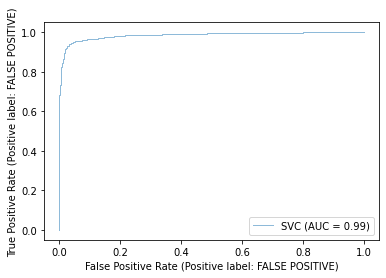

In [77]:
viz = plot_roc_curve(svmc_classifier_lin, x_test, y_test, alpha=0.5, lw=1)
AUC_svmc_lin = viz.roc_auc
print("Área sob a curva ROC {:.2f}%".format(AUC_svmc_lin*100))

## Kernel Polinomial

In [78]:
acuracia_treino, acuracia_teste, c,accu_treino, accu_test = svc_single(regularizators,"poly",100000,X_minmax,Y)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


kernelpoly,C=1000,accuTreino=0.97,AccuTest=0.95


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


In [79]:
acuracia_treino, acuracia_teste, c

(0.9724933451641526, 0.9483800109829764, 1000)

### Validação Cruzada


Obtivemos uma acurácia bem superior, agora vamos obter a validação cruzada

In [80]:
'''x_train, x_test, y_train, y_test = train_test_split(X_minmax, Y, 
                                        test_size=0.35, random_state=seed)'''

'x_train, x_test, y_train, y_test = train_test_split(X_minmax, Y, \n                                        test_size=0.35, random_state=seed)'

In [81]:
svmc_cv_scores_mean, svmc_cv_scores_std, svmc_accuracy_scores = validacao_cruzada_variando_C(x_train, y_train, regularizators,'poly',100000, cv=5, scoring='accuracy')

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (ma

Melhor CV = 0.951 com acuracia de treino = 0.966 com C=400.000


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


Melhor CV = 0.951 com acuracia de treino = 0.966 com C=400.000

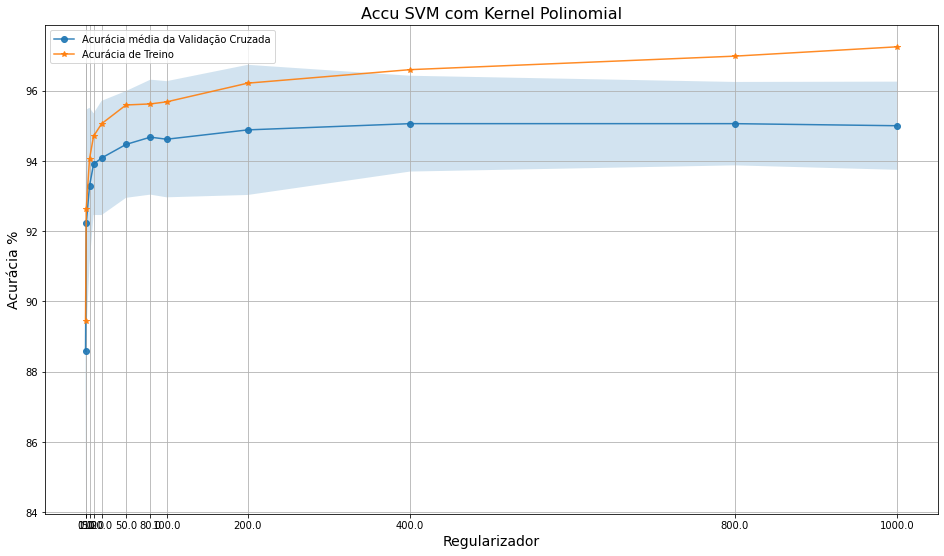

In [82]:
plot_cross_validation_on_svmc(regularizators, svmc_cv_scores_mean, svmc_cv_scores_std, svmc_accuracy_scores, 'Accu SVM com Kernel Polinomial')

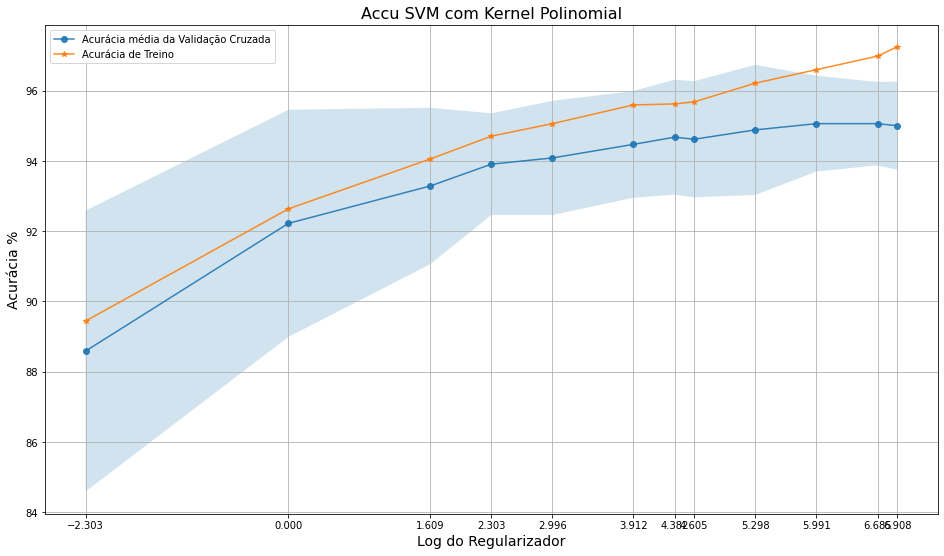

In [83]:
plot_log_cross_validation_on_svmc(regularizators, svmc_cv_scores_mean, svmc_cv_scores_std, svmc_accuracy_scores, 'Accu SVM com Kernel Polinomial')

### Precision e Recall




Apesar da maior acurácia ao utilizar C=400, vamos utilizar C=200 por obter acurácias de treino dentro de dois desvios padrões dos valores obtidos para validação cruzada.

In [84]:
# cria o modelo
svmc_classifier = SVC(C=200, kernel="poly" , max_iter=100000, random_state=seed)

# Ajusta aos dados
svmc_classifier = svmc_classifier.fit(x_train,y_train)

#Prediz os dados de teste
y_pred = svmc_classifier.predict(x_test)

print("Acurácia do SVC Polinomial nos dados de treino: {:.2f} %"
        .format(svmc_classifier.score(x_train,y_train)*100))

print("Acurácia do SVC Polinomial nos dados de teste: {:.2f} %"
        .format(svmc_classifier.score(x_test,y_test)*100))

Acurácia do SVC Polinomial nos dados de treino: 96.21 %
Acurácia do SVC Polinomial nos dados de teste: 94.62 %


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


Considerando o SVC com C=400 e limitado a 100k iterações, foram construídas a matriz de confusão e curva ROC abaixo, além das métricas de Precisão e Revogação.

In [85]:
cm = confusion_matrix(y_test, y_pred)
print("TP: {}".format(cm[0][0]))
print("FN: {}".format(cm[0][1]))
print("FP: {}".format(cm[1][0]))
print("TN: {}".format(cm[1][1]))

TP: 698
FN: 25
FP: 73
TN: 1025


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


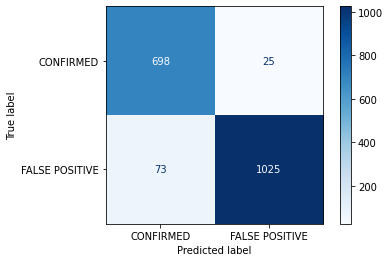

In [86]:
plot_confusion_matrix(svmc_classifier, x_test, y_test, cmap=plt.cm.Blues, values_format = 'd')

In [87]:
recall = sk.metrics.recall_score(y_test, y_pred, average="binary", pos_label="CONFIRMED")
precision = sk.metrics.precision_score(y_test, y_pred, average="binary", pos_label="CONFIRMED")

print("Foi obtida uma revogação = {:.2f} % e precisão = {:.2f} %".format(recall*100, precision*100))

Foi obtida uma revogação = 96.54 % e precisão = 90.53 %


Área sob a curva ROC 98.65%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


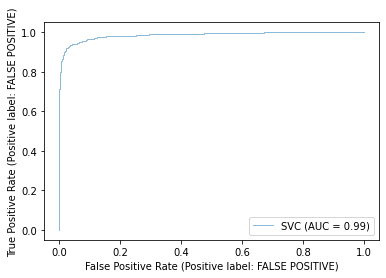

In [88]:
viz = plot_roc_curve(svmc_classifier, x_test, y_test, alpha=0.5, lw=1)
AUC = viz.roc_auc*100
print("Área sob a curva ROC {:.2f}%".format(AUC))

## Kernel RBF

In [89]:
acuracia_treino, acuracia_teste, c,accu_treino, accu_test = svc_single(regularizators,"rbf",100000,X_minmax,Y)

kernelrbf,C=1000,accuTreino=0.97,AccuTest=0.94


In [90]:
acuracia_treino, acuracia_teste, c

(0.9650990831115055, 0.9445359692476661, 1000)

### Validação Cruzada


Obtivemos uma acurácia bem superior, agora vamos obter a validação cruzada

In [91]:
'''x_train, x_test, y_train, y_test = train_test_split(X_minmax, Y, 
                                        test_size=0.35, random_state=seed)'''

'x_train, x_test, y_train, y_test = train_test_split(X_minmax, Y, \n                                        test_size=0.35, random_state=seed)'

In [92]:
svmc_cv_scores_mean, svmc_cv_scores_std, svmc_accuracy_scores = validacao_cruzada_variando_C(x_train, y_train, regularizators,'rbf',100000, cv=5, scoring='accuracy')

Melhor CV = 0.946 com acuracia de treino = 0.965 com C=1000.000


Melhor CV = 0.946 com acuracia de treino = 0.965 com C=1000.000

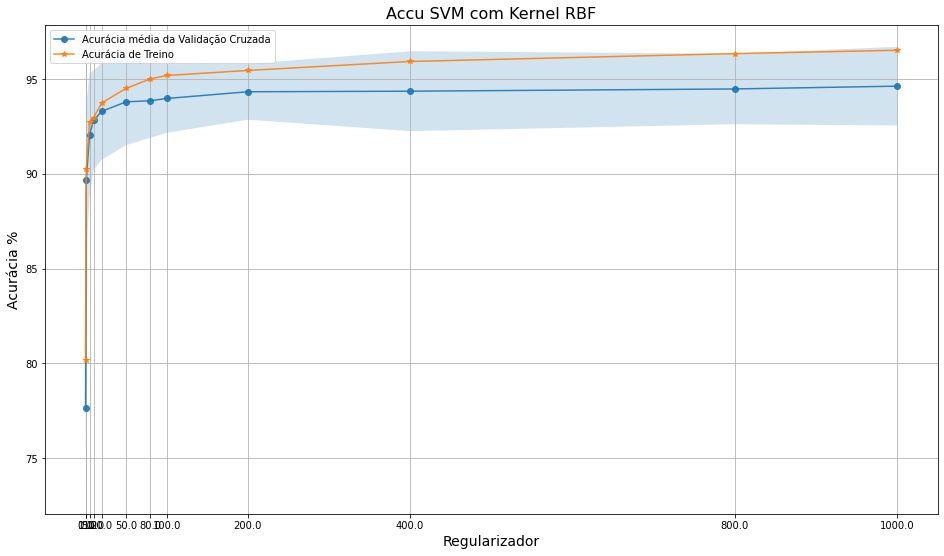

In [93]:
plot_cross_validation_on_svmc(regularizators, svmc_cv_scores_mean, svmc_cv_scores_std, svmc_accuracy_scores, 'Accu SVM com Kernel RBF')

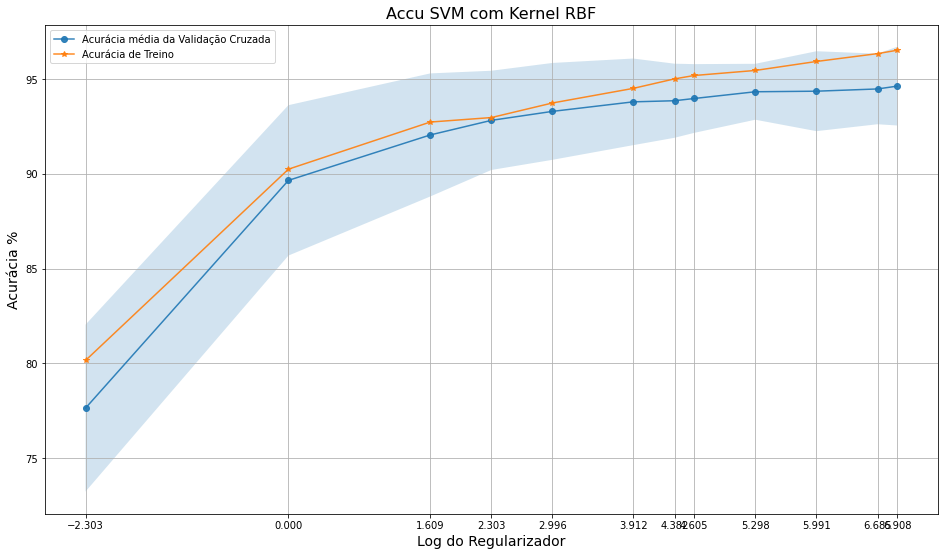

In [94]:
plot_log_cross_validation_on_svmc(regularizators, svmc_cv_scores_mean, svmc_cv_scores_std, svmc_accuracy_scores, 'Accu SVM com Kernel RBF')

### Precision e Recall

Apesar da maior acurácia ao utilizar C=1000, vamos utilizar C=200 por obter acurácias de treino dentro de dois desvios padrões dos valores obtidos para validação cruzada.



In [95]:
# cria o modelo
svmc_classifier = SVC(C=200, kernel="rbf" , max_iter=100000, random_state=seed)

# Ajusta aos dados
svmc_classifier = svmc_classifier.fit(x_train,y_train)

#Prediz os dados de teste
y_pred = svmc_classifier.predict(x_test)

print("Acurácia do SVC RBF nos dados de treino: {:.2f} %"
        .format(svmc_classifier.score(x_train,y_train)*100))

print("Acurácia do SVC RBF nos dados de teste: {:.2f} %"
        .format(svmc_classifier.score(x_test,y_test)*100))

Acurácia do SVC RBF nos dados de treino: 95.45 %
Acurácia do SVC RBF nos dados de teste: 93.85 %


Considerando o SVC com C=200 e limitado a 100k iterações, foram construídas a matriz de confusão e curva ROC abaixo, além das métricas de Precisão e Revogação.

In [96]:
cm = confusion_matrix(y_test, y_pred)
print("TP: {}".format(cm[0][0]))
print("FN: {}".format(cm[0][1]))
print("FP: {}".format(cm[1][0]))
print("TN: {}".format(cm[1][1]))

TP: 700
FN: 23
FP: 89
TN: 1009


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


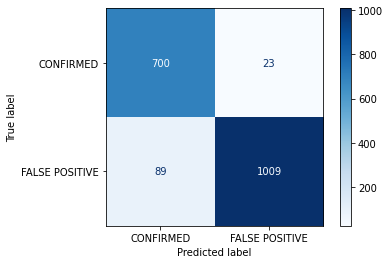

In [97]:
plot_confusion_matrix(svmc_classifier, x_test, y_test, cmap=plt.cm.Blues, values_format = 'd')

In [98]:
recall = sk.metrics.recall_score(y_test, y_pred, average="binary", pos_label="CONFIRMED")
precision = sk.metrics.precision_score(y_test, y_pred, average="binary", pos_label="CONFIRMED")

print("Foi obtida uma revogação = {:.2f} % e precisão = {:.2f} %".format(recall*100, precision*100))

Foi obtida uma revogação = 96.82 % e precisão = 88.72 %


Área sob a curva ROC 98.32%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


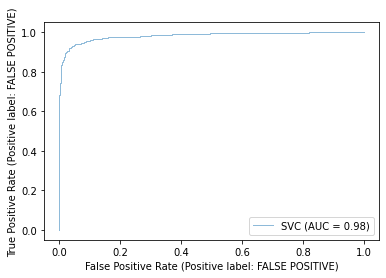

In [99]:
viz = plot_roc_curve(svmc_classifier, x_test, y_test, alpha=0.5, lw=1)
AUC = viz.roc_auc*100
print("Área sob a curva ROC {:.2f}%".format(AUC))

## Kernel Sigmoid

In [100]:
acuracia_treino, acuracia_teste, c,accu_treino, accu_test = svc_single(regularizators,"sigmoid",100000,X_minmax,Y)

kernelsigmoid,C=0.1,accuTreino=0.59,AccuTest=0.60


In [101]:
acuracia_treino, acuracia_teste, c

(0.5921325051759835, 0.6035145524437122, 0.1)

### Validação Cruzada


Obtivemos uma acurácia bem superior, agora vamos obter a validação cruzada

In [102]:
'''x_train, x_test, y_train, y_test = train_test_split(X_minmax, Y, 
                                        test_size=0.35, random_state=seed)'''

'x_train, x_test, y_train, y_test = train_test_split(X_minmax, Y, \n                                        test_size=0.35, random_state=seed)'

In [103]:
svmc_cv_scores_mean, svmc_cv_scores_std, svmc_accuracy_scores = validacao_cruzada_variando_C(x_train, y_train, regularizators,'sigmoid',100000, cv=5, scoring='accuracy')

Melhor CV = 0.592 com acuracia de treino = 0.592 com C=0.100


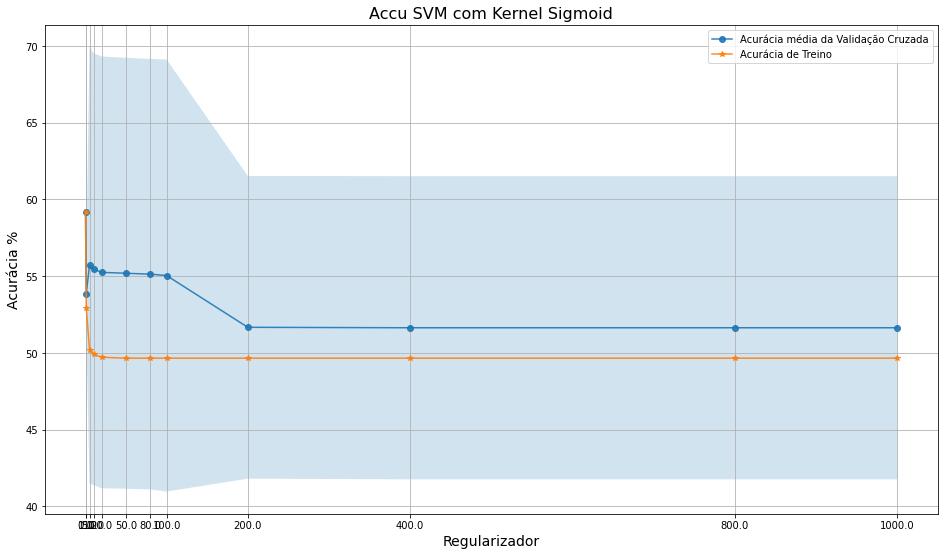

In [104]:
plot_cross_validation_on_svmc(regularizators, svmc_cv_scores_mean, svmc_cv_scores_std, svmc_accuracy_scores, 'Accu SVM com Kernel Sigmoid')

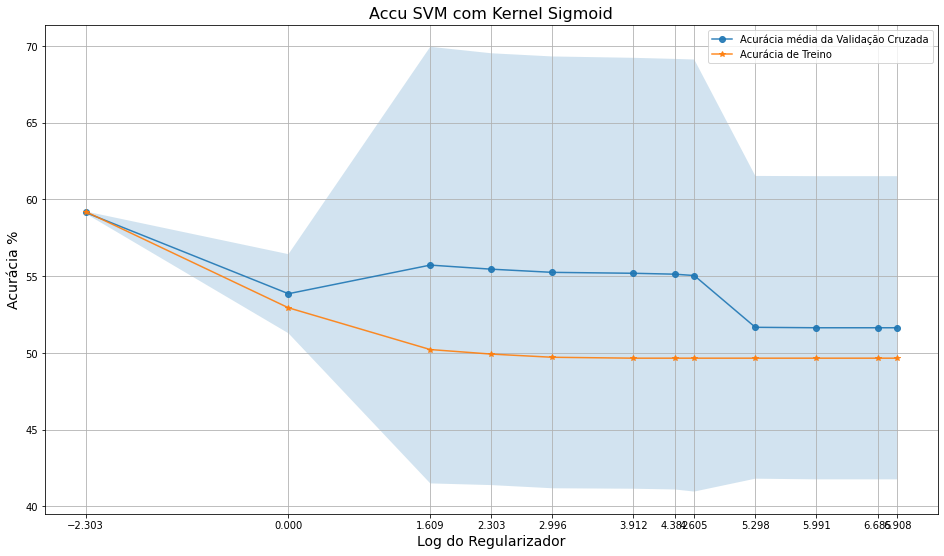

In [105]:
plot_log_cross_validation_on_svmc(regularizators, svmc_cv_scores_mean, svmc_cv_scores_std, svmc_accuracy_scores, 'Accu SVM com Kernel Sigmoid')

### Precision e Recall




In [106]:
# cria o modelo
svmc_classifier = SVC(C=0.1, kernel="sigmoid" , max_iter=100000, random_state=seed)

# Ajusta aos dados
svmc_classifier = svmc_classifier.fit(x_train,y_train)

#Prediz os dados de teste
y_pred = svmc_classifier.predict(x_test)

print("Acurácia do SVC Sigmoid nos dados de treino: {:.2f} %"
        .format(svmc_classifier.score(x_train,y_train)*100))

print("Acurácia do SVC Sigmoid nos dados de teste: {:.2f} %"
        .format(svmc_classifier.score(x_test,y_test)*100))

Acurácia do SVC Sigmoid nos dados de treino: 59.21 %
Acurácia do SVC Sigmoid nos dados de teste: 60.35 %


Considerando o SVC com C=0.1 e limitado a 100k iterações, foram construídas a matriz de confusão e curva ROC abaixo, além das métricas de Precisão e Revogação.

In [107]:
cm = confusion_matrix(y_test, y_pred)
print("TP: {}".format(cm[0][0]))
print("FN: {}".format(cm[0][1]))
print("FP: {}".format(cm[1][0]))
print("TN: {}".format(cm[1][1]))

TP: 1
FN: 722
FP: 0
TN: 1098


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


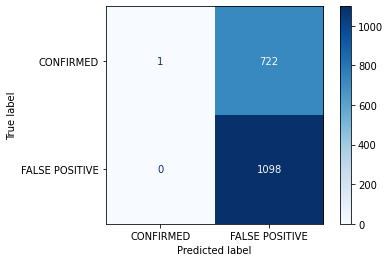

In [108]:
plot_confusion_matrix(svmc_classifier, x_test, y_test, cmap=plt.cm.Blues, values_format = 'd')

In [109]:
recall = sk.metrics.recall_score(y_test, y_pred, average="binary", pos_label="CONFIRMED")
precision = sk.metrics.precision_score(y_test, y_pred, average="binary", pos_label="CONFIRMED")

print("Foi obtida uma revogação = {:.2f} % e precisão = {:.2f} %".format(recall*100, precision*100))

Foi obtida uma revogação = 0.14 % e precisão = 100.00 %


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Área sob a curva ROC 63.17%


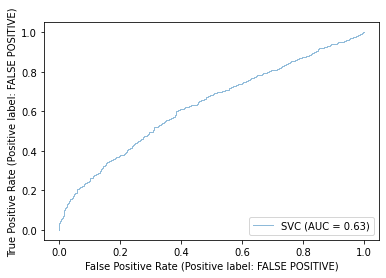

In [110]:
viz = plot_roc_curve(svmc_classifier, x_test, y_test, alpha=0.5, lw=1)
AUC = viz.roc_auc*100
print("Área sob a curva ROC {:.2f}%".format(AUC))

## Conclusões

* Linear

Melhor CV = 0.949 com acuracia de treino = 0.956

Acurácia do SVC Linear nos dados de treino: 95.62 %

Acurácia do SVC Linear nos dados de teste: 94.89 %

Foi obtida uma revogação = 96.82 % e precisão = 90.91 %

Área sob a curva ROC 98.58%



* Polinomial

Melhor CV = 0.951 com acuracia de treino = 0.966

Acurácia do SVC Polinomial nos dados de treino: 96.21 %

Acurácia do SVC Polinomial nos dados de teste: 94.62 %

Foi obtida uma revogação = 96.82 % e precisão = 88.72 %

Área sob a curva ROC 98.32%


* RBF

Melhor CV = 0.946 com acuracia de treino = 0.965

Acurácia do SVC RBF nos dados de treino: 95.45 %

Acurácia do SVC RBF nos dados de teste: 93.85 %

Foi obtida uma revogação = 96.68 % e precisão = 90.08 %

Área sob a curva ROC 98.56%




* Sigmoid

Melhor CV = 0.592 com acuracia de treino = 0.592

Acurácia do SVC Sigmoid nos dados de treino: 59.21 %

Acurácia do SVC Sigmoid nos dados de teste: 60.35 %

Foi obtida uma revogação = 0.14 % e precisão = 100.00 %

Área sob a curva ROC 63.17%




Com exceção do Kernel Sigmoid, um valor maior do regularizador C proporcionou um aumento da acurácia do modelo. Sugere que para esses dados, o modelo está acertando mais ao buscar um modelo que minimize os erros em detrimento de expandir a margem.

Para os Kernels Linear, Polinomial e RBF, foi possível obter acurácias no entorno de 95% para os dados de treino, validação cruzada e dados de teste, o que sugere que os dados estão devidamente ajustados.

Essa hipótese é reforçada pelos valores obtidos de precision +- 90% (acertos do modelo ao classificar os dados como positivo) e recall +- 95% ( identificar os exemplos positivos), mostrando que os modelos são capazes de detectar os casos positivos. A AUC entorno de 98% também reforça essa hipótese. 

# k-NN

Variar o numero k de vizinhos e mostrar os resultados graficamente

KNN - K-Nearest Neighbors ou K- vizinhos mais próximos é um algoritmo que não assume uma distribuição dos dados a priori, ou seja, é um algoritmo não paramétrico. 

Além disso, é um "algoritmo preguiçoso", que não requer treinamento para geração do modelo, e todo dado de treino pode ser usado em teste.

No KNN, K é o número de vizinhos. É o hiperparâmetro mais importante. Tipicamente é um número ímpar quando utilizado numa classificação binária. 

O funcionamento do algoritmo é basicamente: Dado um ponto para o qual queremos classificar, encontre os vizinhos mais próximos e classifique o ponto com base nas classes dos vizinhos mais próximos.

KNN performa melhor com um número reduzido de atributos, principalmente com poucos dados rotulados disponíveis. Ao aumentar o número de dimensões/atributos, corre-se maior risco de provocar overfitting. 

Não há um número ótimo de vizinhos geral para quaisquer dados, vamos ter que experimentar. Para poucos vizinhos, o ruído terá grande influência no resultado, e está sujeito a menor viés e maior variância. Com muitos vizinhos, se aumenta o custo computacional, e implica em menor erro de variância, porém com maior viés.

In [111]:
from sklearn.neighbors import KNeighborsClassifier

## Funções auxiliares

In [112]:
def knn_multi_k_cv(n_vizinhos,x_train, x_test, y_train, y_test,cv, scoring='accuracy'):
  plt.figure(dpi=150)
  labels = ["Validacao Cruzada", "Treino", "Teste"]
  colours = ["g", "b", "k"]

  accu_treino = []
  accu_test = []
  for k_vizinhos in n_vizinhos:
    knn_model = KNeighborsClassifier(n_neighbors= k_vizinhos)
    val_cruzada = cross_val_score(knn_model, x_train, y_train, cv=cv).mean() *100#pega a média dos valores obtidos
    print("Acurácia do KNN validação cruzada com K-fold = 5: {:.2f} %".format(val_cruzada))
    
    
    knn_model.fit(x_train,y_train)
    treino = knn_model.score(x_train,y_train)*100
    accu_treino.append(treino)
    print("Acurácia do KNN com {} vizinhos nos dados de treino: {:.2f} %".format(k_vizinhos, treino))

    teste = knn_model.score(x_test,y_test)*100
    accu_test.append(teste)
    print("Acurácia do KNN com {} vizinhos nos dados de teste: {:.2f} %".format(k_vizinhos, teste))

    plt.scatter(k_vizinhos, val_cruzada, c=colours[0], alpha=0.5,label=labels[0])
    plt.scatter(k_vizinhos, treino, c=colours[1], alpha=0.5, label=labels[1])
    plt.scatter(k_vizinhos, teste, c=colours[2], alpha=0.5, label=labels[2])

  plt.grid()
  plt.legend(labels, loc='best', bbox_to_anchor=(1, 0.5, 0.5, 0.5))
  plt.xticks(n_vizinhos) 
  plt.xlabel("N Vizinhos")
  plt.ylabel("Acurácia em %")
  plt.show()

  accu_treino = np.array(accu_treino)
  accu_test = np.array(accu_test)  
  idx_max = accu_test.argmax()
  best_treino = accu_treino[idx_max]  
  best_test = accu_test[idx_max]
  best_vizinho = n_vizinhos[idx_max]
  print("Com {} vizinhos ,obteve a melhor acuracia de teste: accuTreino={:.2f}% ,AccuTest={:.2f} %".format(best_vizinho,best_treino,best_test))
  return best_vizinho, best_treino, best_test, accu_treino, accu_test

In [113]:
def validacao_cruzada_variando_vizinhos(x_train, y_train, n_vizinhos, cv, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for k_vizinhos in n_vizinhos:
        knn_model = KNeighborsClassifier(n_neighbors= k_vizinhos)
        cv_scores = cross_val_score(knn_model, x_train, y_train, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(knn_model.fit(x_train, y_train).score(x_train, y_train))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    idx_max = cv_scores_mean.argmax()
    best_CV = cv_scores_mean[idx_max]
    best_accu = accuracy_scores[idx_max]
    best_vizinho = n_vizinhos[idx_max]
    print("{} vizinhos obtiveram a melhor validação cruzada = {:.3f}% com acuracia de treino = {:.3f}%".format(best_vizinho, best_CV*100, best_accu*100))
    return cv_scores_mean, cv_scores_std, accuracy_scores, best_vizinho

In [114]:
# function for plotting cross-validation results
def plot_cross_validation_on_knn(n_vizinhos, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(16,9))
    ax.plot(n_vizinhos, cv_scores_mean*100, '-o', label='Acurácia média da Validação Cruzada', alpha=0.9)
    ax.fill_between(n_vizinhos, (cv_scores_mean-2*cv_scores_std)*100, (cv_scores_mean+2*cv_scores_std)*100, alpha=0.2) #2 desvios padrões
    ylim = plt.ylim()
    ax.plot(n_vizinhos, accuracy_scores*100, '-*', label='Acurácia de Treino', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel("N Vizinhos", fontsize=14)
    #ax.set_xlim(-100,1100)
    ax.set_ylabel('Acurácia %', fontsize=14)
    #ax.set_ylim(ylim)
    ax.set_xticks(n_vizinhos)
    ax.grid()
    ax.legend()

## Implementação

In [115]:
X_pre = X.values
min_max_scaler = sk.preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X_pre)
X_minmax = pd.DataFrame(X_scaled)
X_minmax

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,0.008573,0.001448,0.020608,0.000712,0.000211,0.003492,0.000011,0.038524,0.996124,0.072275,...,0.739274,0.802901,0.770674,0.137836,0.319887,0.735977,0.002257,0.337466,0.713451,0.003571
1,0.050528,0.005813,0.031801,0.001011,0.000267,0.003291,0.000014,0.131308,0.995097,0.036189,...,0.736435,0.803485,0.770840,0.137750,0.325841,0.734043,0.004402,0.343309,0.711688,0.005580
2,0.001335,0.012658,0.016627,0.009347,0.003866,0.000240,0.000167,0.009619,0.738798,0.134344,...,0.737825,0.801011,0.771295,0.137686,0.316329,0.735464,0.003262,0.332664,0.711494,0.003080
3,0.002072,0.006954,0.011196,0.000697,0.000228,0.002162,0.000013,0.014897,0.947668,0.135478,...,0.738095,0.801471,0.770728,0.137919,0.320482,0.733172,0.001129,0.337324,0.710761,0.000781
4,0.006588,0.011597,0.035521,0.000269,0.001823,0.000005,0.000195,0.036896,0.668453,0.128879,...,0.702100,0.849537,0.771297,0.136974,0.252962,0.808607,0.100790,0.271669,0.782124,0.099866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5197,0.348845,0.009553,0.199049,0.000844,0.000316,0.000008,0.000012,0.434716,0.983696,0.011754,...,0.735444,0.800403,0.770829,0.137983,0.355165,0.724468,0.028781,0.370101,0.702134,0.028348
5198,0.007734,0.007589,0.033961,0.000101,0.000081,0.000205,0.000005,0.034874,0.944590,0.086298,...,0.741068,0.803425,0.770697,0.137914,0.338791,0.722437,0.019752,0.355565,0.698516,0.020536
5199,0.000206,0.012420,0.022520,0.001826,0.002967,0.000178,0.000146,0.002762,0.210808,0.205794,...,0.740243,0.800032,0.770667,0.137962,0.351771,0.717050,0.031185,0.369731,0.694286,0.032690
5200,0.000350,0.001458,0.005493,0.000119,0.000082,0.009771,0.000005,0.004193,0.984038,0.219198,...,0.757405,0.789726,0.770574,0.138017,0.370795,0.698743,0.056433,0.384495,0.674490,0.057589


In [116]:
x_train, x_test, y_train, y_test = train_test_split(X_minmax, Y, 
                                        test_size=0.35, random_state=seed)

In [117]:
knn_model = KNeighborsClassifier() #default = 5
knn_model.fit(x_train,y_train)
y_pred = knn_model.predict(x_test)

print("Acurácia obtida para KNN  = {:.3f}%".format(accuracy_score(y_test,y_pred)*100))

Acurácia obtida para KNN  = 83.361%


## Cross Validation

In [118]:
n_vizinhos = [1,2,3,4,5,7,10,15,20,25,30,35,40,50]

In [119]:
cv_scores_mean, cv_scores_std, accuracy_scores, best_vizinho = validacao_cruzada_variando_vizinhos(x_train, y_train, n_vizinhos, k_fold, scoring='accuracy')

7 vizinhos obtiveram a melhor validação cruzada = 82.284% com acuracia de treino = 86.661%


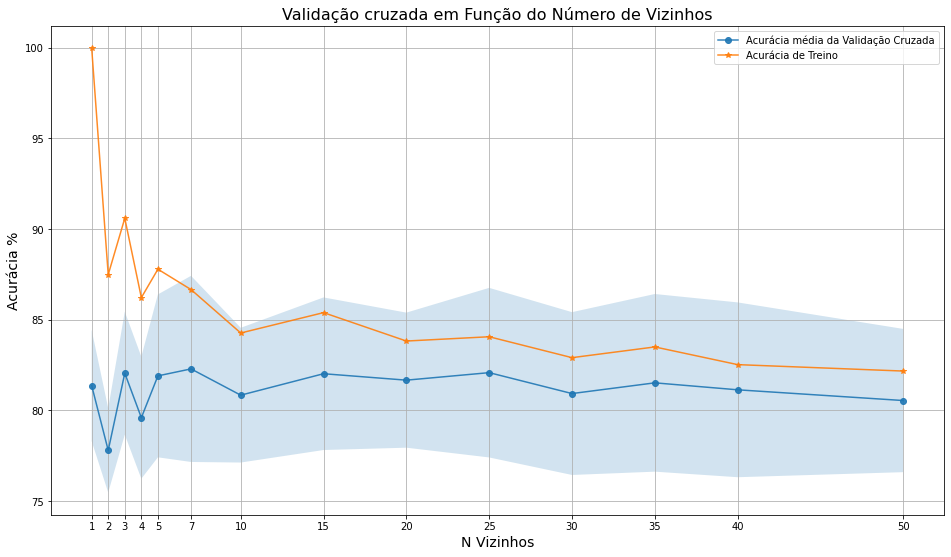

In [120]:
plot_cross_validation_on_knn(n_vizinhos, cv_scores_mean, cv_scores_std, accuracy_scores, "Validação cruzada em Função do Número de Vizinhos")

## Teste

Acurácia do KNN validação cruzada com K-fold = 5: 81.37 %
Acurácia do KNN com 1 vizinhos nos dados de treino: 100.00 %
Acurácia do KNN com 1 vizinhos nos dados de teste: 81.82 %
Acurácia do KNN validação cruzada com K-fold = 5: 77.79 %
Acurácia do KNN com 2 vizinhos nos dados de treino: 87.49 %
Acurácia do KNN com 2 vizinhos nos dados de teste: 78.58 %
Acurácia do KNN validação cruzada com K-fold = 5: 82.05 %
Acurácia do KNN com 3 vizinhos nos dados de treino: 90.59 %
Acurácia do KNN com 3 vizinhos nos dados de teste: 83.53 %
Acurácia do KNN validação cruzada com K-fold = 5: 79.59 %
Acurácia do KNN com 4 vizinhos nos dados de treino: 86.22 %
Acurácia do KNN com 4 vizinhos nos dados de teste: 80.83 %
Acurácia do KNN validação cruzada com K-fold = 5: 81.90 %
Acurácia do KNN com 5 vizinhos nos dados de treino: 87.78 %
Acurácia do KNN com 5 vizinhos nos dados de teste: 83.36 %
Acurácia do KNN validação cruzada com K-fold = 5: 82.28 %
Acurácia do KNN com 7 vizinhos nos dados de treino: 86.6

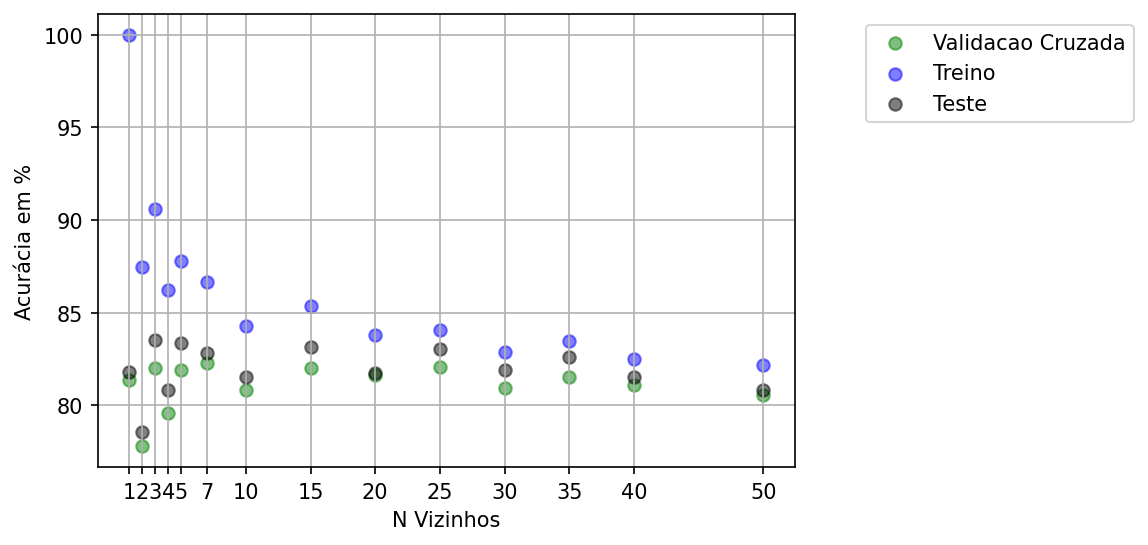

Com 3 vizinhos ,obteve a melhor acuracia de teste: accuTreino=90.59% ,AccuTest=83.53 %


(3,
 90.59449866903283,
 83.52553542009885,
 array([100.        ,  87.48890861,  90.59449867,  86.21709553,
         87.78467909,  86.66075126,  84.26501035,  85.38893818,
         83.82135463,  84.05797101,  82.90446613,  83.4960071 ,
         82.51996451,  82.16503993]),
 array([81.82317408, 78.58319605, 83.52553542, 80.83470621, 83.36079077,
        82.81164195, 81.54859967, 83.14113125, 81.7682592 , 83.03130148,
        81.93300384, 82.59198243, 81.54859967, 80.83470621]))

In [121]:
knn_multi_k_cv(n_vizinhos,x_train, x_test, y_train, y_test,k_fold, scoring='accuracy')

## Precision, Recall e ROC/AUC

In [122]:
knn_model = KNeighborsClassifier(n_neighbors=20)

In [123]:

treino_temp = []
teste_temp =[]
cv_knn_temp = []

for i in range(1,25):
  cv_knn_temp.append(cross_val_score(knn_model, x_train, y_train, cv=k_fold, scoring="accuracy").mean())
  knn_model.fit(x_train,y_train)
  treino_temp.append(knn_model.score(x_train,y_train))
  y_pred = knn_model.predict(x_test)
  teste_temp.append(accuracy_score(y_test,y_pred))


In [124]:
treino_knn = np.mean(np.array(treino_temp))
test_knn = np.mean(np.array(teste_temp))
cv_knn = np.mean(np.array(cv_knn_temp))

print("Acurácia do KNN com 20 vizinhos na validação cruzada: {:.2f} %"
        .format(cv_knn*100))
print("Acurácia de treino obtida para KNN com 20 vizinhos = {:.3f}%".format(treino_knn*100))
print("Acurácia de teste obtida para KNN com 20 vizinhos  = {:.3f}%".format(test_knn*100))

Acurácia do KNN com 20 vizinhos na validação cruzada: 81.66 %
Acurácia de treino obtida para KNN com 20 vizinhos = 83.821%
Acurácia de teste obtida para KNN com 20 vizinhos  = 81.768%


Considerando KNN com 20 vizinhos

In [125]:
y_pred = knn_model.predict(x_test)

In [126]:
cm = confusion_matrix(y_test, y_pred)
print("TP: {}".format(cm[0][0]))
print("FN: {}".format(cm[0][1]))
print("FP: {}".format(cm[1][0]))
print("TN: {}".format(cm[1][1]))

TP: 690
FN: 33
FP: 299
TN: 799


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


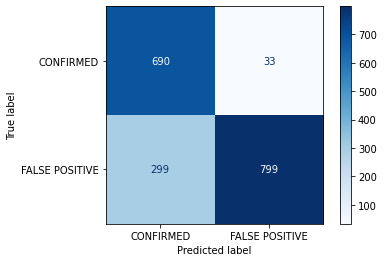

In [127]:
plot_confusion_matrix(knn_model, x_test, y_test, cmap=plt.cm.Blues, values_format = 'd')

In [128]:
recall_knn = sk.metrics.recall_score(y_test, y_pred, average="binary", pos_label="CONFIRMED")
precision_knn = sk.metrics.precision_score(y_test, y_pred, average="binary", pos_label="CONFIRMED")

print("Foi obtida uma revogação = {:.2f} % e precisão = {:.2f} %".format(recall_knn*100, precision_knn*100))

Foi obtida uma revogação = 95.44 % e precisão = 69.77 %


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Área sob a curva ROC 91.5793%


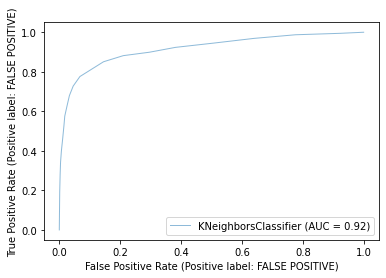

In [129]:
viz = plot_roc_curve(knn_model, x_test, y_test, alpha=0.5, lw=1)
AUC_knn = viz.roc_auc
print("Área sob a curva ROC {:.4f}%".format(AUC_knn*100))

## Conclusões

O Modelo se mostrou bastante instável, obtendo diferentes performances para diferences números de vizinhos, o que dificulta sua análise. Para efeito de discussão foi considerado o melhor desempenho de teste do modelo utilizando 20 vizinhos, uma vez que para esse valor os valores de treino e teste e validação ccruzada convergiram. Ao se utilizar um menor número de vizinhos, a acurácia de treino é superior, no entanto, diverge muito da validação cruzada e da acurácia de teste. 


Com 20 vizinhos obtive-se a melhor validação cruzada. Ao rodar 25 testes, foi obtido:

Acurácia do KNN com 20 vizinhos na validação cruzada: 81.66 %

Acurácia de treino obtida para KNN com 20 vizinhos = 83.821%

Acurácia de teste obtida para KNN com 20 vizinhos  = 81.768%

Ainda utilizando um modelo com 20 vizinhos, foi obtida uma revogação = 95.44 % e precisão = 69.77 % Isso sugere que o modelo consegue identificar os exemplos positivos (recall alto), no entanto, o modelo erra muito ao classificar os dados como positivos, ou seja, gera muitos falsos positivos como também pode ser visto na matriz de confusão (baixa precisão). Isso também se reflete na área sob a curva ROC:

Área sob a curva ROC 95.7088%. Esse valor varia bastante para cada modelo treinado.




# Random Forest

**Tarefa: Variar o numero de arvores e mostrar os resultados graficamente**


O modelo de Random Forest opera através de blocos de árvores de decisão. Sua intuição parte de um conceito da "Sabedoria das Multidões". Basicamente são geradas diversas árvores de decisão simples, cada qual providenciará uma classificação para o dado, e aquela classificação com maior número de modelos predizendo, será escolhida.

Um ponto importante para o funcionamento do Random Forest é a independência/baixa correlação entre os modelos construídos. A soma das partes dos modelos simples gera um modelo mais acurado que uma única árvore mais complexa. Isso se deve ao fato das múltiplas árvores se corrigirem umas as outras de erros individuais, desde de que não errem todas na mesma direção.

São definidos 2 pré-requisitos para o random forest:
* Os dados devem ser separáveis através dos atributos
* As predições e erros de cada árvore individual deve ter baixa correlação com as demais

Um procedimento utilizado para garantir a não correlação dos dados é o baging. Esse método consiste em deixar que cada árvore que compõe a floresta retire amostras do dataset com reposição. Isso resulta em árvores diferentes, algumas com sobreposição de dados e outras não, garantindo árvores distintas, menos susceptíveis a erros de variância.

Um outro procedimento adotado para garantir a geração de árvores distintas é a "Aleatoriedade de Atributos". Nesse processo, ao invés de escolher o melhor atributo para o nó, dentre todos os disponíveis, a árvore é forçada a escolher dentre um subconjunto aleatório de atributos, o que aumenta a chance de se obter árvores distintas.

Dessa forma, a floresta final é composta por árvorss que não apenas foram treinadas em subconjuntos de dados distintos, mas que também utilizaram diferentes atributos para tomar as decisões.

## Implementação

In [130]:
from sklearn.ensemble import RandomForestClassifier

Vamos construir o modelo utilizando o Baging (Default) e 

N° de árvores: n_estimators=100(Default)

In [131]:
# cria o modelo
rf_classifier = RandomForestClassifier(bootstrap=True,random_state=seed) 

# Ajusta aos dados
rf_classifier = rf_classifier.fit(x_train,y_train)

#Prediz os dados de teste
y_pred = rf_classifier.predict(x_test)

Retorna a acurácia

In [132]:
print("Acurácia do Random Forest nos dados de treino: {:.2f} %"
        .format(rf_classifier.score(x_train,y_train)*100))

Acurácia do Random Forest nos dados de treino: 100.00 %


In [133]:
print("Acurácia do Random Forest nos dados de teste: {:.2f} %"
        .format(rf_classifier.score(x_test,y_test)*100))


Acurácia do Random Forest nos dados de teste: 96.71 %


## Validação Cruzada

Vamos variar o número de árvores da floresta e avaliar através da validação cruzada com k-Fold=5.


In [134]:
def validacao_cruzada_variando_narvores(x, y, n_arvores,start=10, step= 50,cv=5, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for arvores_floresta in np.arange(start,n_arvores,step):
        forest_model = RandomForestClassifier(n_estimators=arvores_floresta, random_state=seed) 
        cv_scores = cross_val_score(forest_model, x, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(forest_model.fit(x, y).score(x, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores
  
# function for plotting cross-validation results
def plot_cross_validation_on_forests(n_arvores, cv_scores_mean, cv_scores_std, accuracy_scores):
    fig, ax = plt.subplots(1,1, figsize=(16,9))
    ax.plot(n_arvores, cv_scores_mean, '-o', label='Acurácia média da Validação Cruzada', alpha=0.9)
    ax.fill_between(n_arvores, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2) #2 desvios padrões
    ylim = plt.ylim()
    ax.plot(n_arvores, accuracy_scores, '-*', label='Acurácia de Treino', alpha=0.9)
    #ax.set_title(title, fontsize=16)
    ax.set_xlabel('Número de Árvores', fontsize=14)
    ax.set_ylabel('Acurácia', fontsize=14)
    #ax.set_ylim(ylim)
    ax.set_xticks(n_arvores)
    ax.grid()
    ax.legend()

In [135]:
# Variando numero de arvores de 1 a 101 (step=10)
start =1
n_arvores = 101
step=10

In [136]:
forest_cv_scores_mean, forest_cv_scores_std, forest_accuracy_scores = validacao_cruzada_variando_narvores(x_train, y_train, n_arvores, start,step)

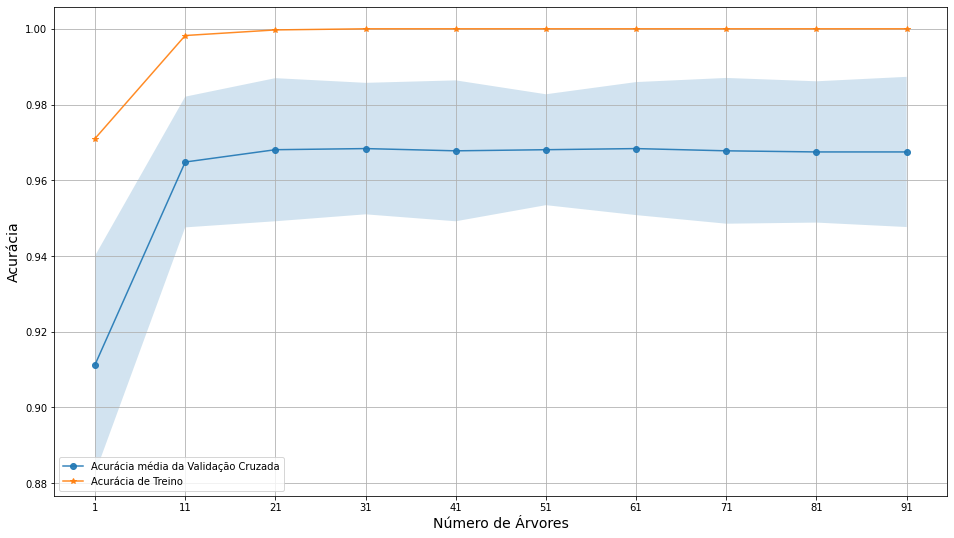

In [137]:
plot_cross_validation_on_forests(np.arange(start,n_arvores,step), forest_cv_scores_mean, forest_cv_scores_std, forest_accuracy_scores)

In [138]:
lista_arvores_floresta = []
for arvores_floresta in np.arange(start,n_arvores,step):
  lista_arvores_floresta.append(arvores_floresta)
lista_arvores_floresta

[1, 11, 21, 31, 41, 51, 61, 71, 81, 91]

In [139]:
idx_max = forest_cv_scores_mean.argmax()
sm_best_forest = lista_arvores_floresta[idx_max]
sm_best_forest_cv_score = forest_cv_scores_mean[idx_max]
sm_best_forest_cv_score_std = forest_cv_scores_std[idx_max]
print('A Floresta com {} árvores atingiu a melhor acurácia média na validação cruzada (K-Fold=5): {} +/- {}% nos dados de treino'.format(
      sm_best_forest, round(sm_best_forest_cv_score*100,5), round(sm_best_forest_cv_score_std*100, 5)))

A Floresta com 31 árvores atingiu a melhor acurácia média na validação cruzada (K-Fold=5): 96.83567 +/- 0.86844% nos dados de treino


## Aplicação nos dados de Teste

Acurácia do Random Forest com 1 arvores para validação cruzada com K-fold = 5: 91.13 %
Acurácia do Random Forest com 1 arvores para dados de treino: 97.10 %
Acurácia do Random Forest com 1 arvores para dados de teste: 91.60 %
Acurácia do Random Forest com 11 arvores para validação cruzada com K-fold = 5: 96.48 %
Acurácia do Random Forest com 11 arvores para dados de treino: 99.82 %
Acurácia do Random Forest com 11 arvores para dados de teste: 96.27 %
Acurácia do Random Forest com 21 arvores para validação cruzada com K-fold = 5: 96.81 %
Acurácia do Random Forest com 21 arvores para dados de treino: 99.97 %
Acurácia do Random Forest com 21 arvores para dados de teste: 96.60 %
Acurácia do Random Forest com 31 arvores para validação cruzada com K-fold = 5: 96.84 %
Acurácia do Random Forest com 31 arvores para dados de treino: 100.00 %
Acurácia do Random Forest com 31 arvores para dados de teste: 96.81 %
Acurácia do Random Forest com 41 arvores para validação cruzada com K-fold = 5: 96.78 

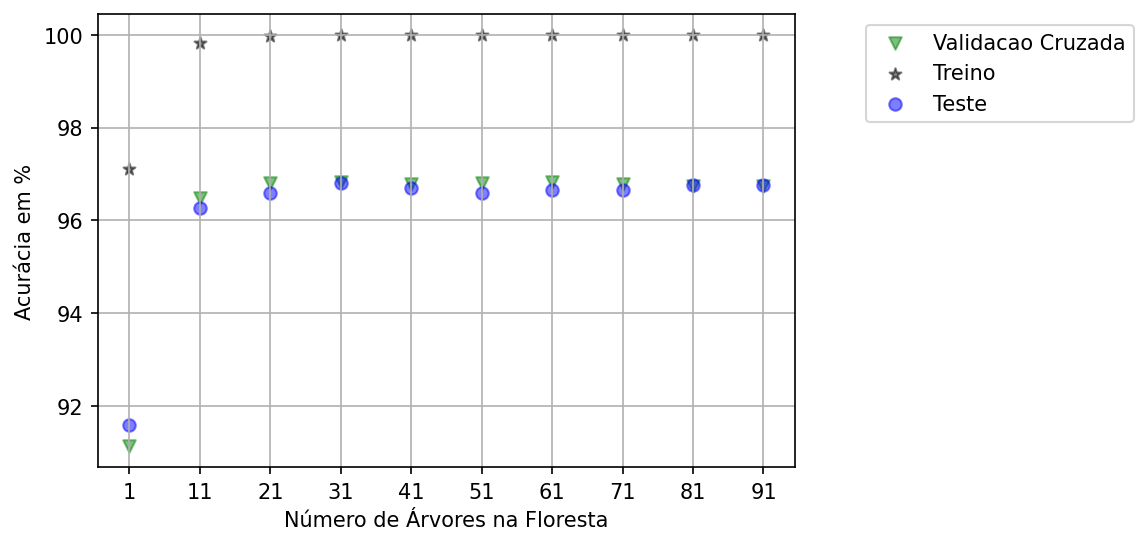

In [140]:
plt.figure(dpi=150)
labels = ["Validacao Cruzada", "Treino", "Teste"]
markers = ["v","*","o"]
colours = ["g","k","b"]
# Variando numero de arvores de 1 a 101 (step=10)
for arvores_floresta in np.arange(start,n_arvores,step):
  forest_model = RandomForestClassifier(n_estimators=arvores_floresta, random_state=seed)

  #Validação Cruzada
  val_cruzada = cross_val_score(forest_model, x_train, y_train, cv=k_fold, scoring='accuracy').mean()*100
  print("Acurácia do Random Forest com {} arvores para validação cruzada com K-fold = 5: {:.2f} %".format(arvores_floresta,val_cruzada))
  
  #Ajuste do modelo
  modelo = forest_model.fit(x_train, y_train)
  treino = forest_model.score(x_train,y_train)*100
  print("Acurácia do Random Forest com {} arvores para dados de treino: {:.2f} %".format(arvores_floresta,treino))
  #Teste
  teste = forest_model.score(x_test,y_test)*100
  print("Acurácia do Random Forest com {} arvores para dados de teste: {:.2f} %".format(arvores_floresta,teste))

  plt.scatter(arvores_floresta, val_cruzada, marker=markers[0], color=colours[0], alpha=0.5,label=labels[0])
  plt.scatter(arvores_floresta, treino, c=colours[1], alpha=0.5, marker=markers[1], label=labels[1])
  plt.scatter(arvores_floresta, teste, c=colours[2], alpha=0.5, marker=markers[2], label=labels[2])

plt.grid()
plt.legend(labels, loc='best', bbox_to_anchor=(1, 0.5, 0.5, 0.5))
plt.xticks(np.arange(start, n_arvores, step)) 
plt.xlabel("Número de Árvores na Floresta")
plt.ylabel("Acurácia em %")
plt.show()

## A Melhor floresta encontrada




Apesar de haver um pequeno incremento da acurácia de treino com mais árvores na floresta, a variação é muito pequena, e por isso vamos selecionar um modelo mais simples, com menos árvores. Além disso, pela validação cruzada se observa que as acurácias de treino estão mais distante que dois desvios padrões da acurácia média na validação cruzada, então seria uma boa prática pegar um modelo mais simples para evitar maior susceptibilidade à overfitting.

In [141]:
# cria o modelo
rf_classifier = RandomForestClassifier(n_estimators=21, bootstrap=True,random_state=seed) 

cv_rf = cross_val_score(rf_classifier, x_train, y_train, cv=k_fold, scoring='accuracy').mean()

print("Acurácia do Random Forest na validação cruzada {:.2f} %".format(cv_rf*100))
  

# Ajusta aos dados
rf_classifier = rf_classifier.fit(x_train,y_train)

#Prediz os dados de teste
y_pred = rf_classifier.predict(x_test)

treino_rf = rf_classifier.score(x_train,y_train)
print("Acurácia do Random Forest nos dados de treino: {:.2f} %"
        .format(treino_rf*100))

test_rf = rf_classifier.score(x_test,y_test)
print("Acurácia do Random Forest nos dados de teste: {:.2f} %"
        .format(test_rf*100))

Acurácia do Random Forest na validação cruzada 96.81 %
Acurácia do Random Forest nos dados de treino: 99.97 %
Acurácia do Random Forest nos dados de teste: 96.60 %


Considerando a floresta com 21 árvores de decisão, foram construídas a matriz de confusão e curva ROC abaixo, além das métricas de Precisão e Revogação.

In [142]:
cm = confusion_matrix(y_test, y_pred)
print("TP: {}".format(cm[0][0]))
print("FN: {}".format(cm[0][1]))
print("FP: {}".format(cm[1][0]))
print("TN: {}".format(cm[1][1]))

TP: 692
FN: 31
FP: 31
TN: 1067


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


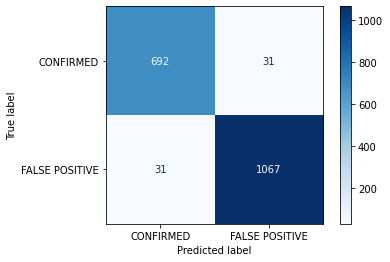

In [143]:
plot_confusion_matrix(rf_classifier, x_test, y_test, cmap=plt.cm.Blues, values_format = 'd')

In [144]:
recall_rf = sk.metrics.recall_score(y_test, y_pred, average="binary", pos_label="CONFIRMED")
precision_rf = sk.metrics.precision_score(y_test, y_pred, average="binary", pos_label="CONFIRMED")

print("Foi obtida uma revogação = {:.2f} % e precisão = {:.2f} %".format(recall_rf*100, precision_rf*100))

Foi obtida uma revogação = 95.71 % e precisão = 95.71 %


Área sob a curva ROC 99.39%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


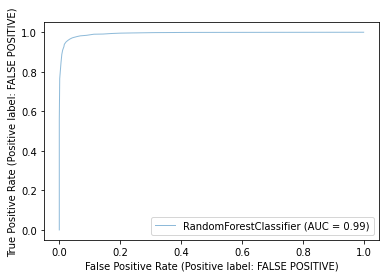

In [145]:
viz = plot_roc_curve(rf_classifier, x_test, y_test, alpha=0.5, lw=1)
AUC_rf = viz.roc_auc
print("Área sob a curva ROC {:.2f}%".format(AUC_rf*100))

## Conclusões

* Hiperparâmetro: Número de árvores na Floresta

A Floresta com 71 árvores atingiu a melhor acurácia média na validação cruzada (K-Fold=5): 96.86526 +/- 0.82603% nos dados de treino

Acurácia do Random Forest com 71 arvores para dados de treino: 100.00 %

Acurácia do Random Forest com 71 arvores para dados de teste: 96.65 %

Apesar de haver um pequeno incremento da acurácia de treino com mais árvores na floresta, a variação é muito pequena, e por isso  selecionamos um modelo mais simples, com menos árvores. Além disso, pela validação cruzada se observa que as acurácias de treino estão mais distante que dois desvios padrões da acurácia média na validação cruzada, então seria uma boa prática pegar um modelo mais simples para evitar maior susceptibilidade à overfitting.


Obsrva-se que os valores de acurácia para validação cruzada e teste foram muito coerentes, divergindo em menos de 0.25. 

Com 21 árvores obtemos:
Acurácia do Random Forest nos dados de treino: 99.97 %

Acurácia do Random Forest nos dados de teste: 96.76 %

Foi obtida uma revogação = 95.71 % e precisão = 96.11 %

Área sob a curva ROC 99.42%


Esses valores sugerem que o modelo está generalizando muito bem os dados, sem erro nos dados de treino e com pouco erro nos testes, tanto de recall quanto de precision.


# Gradient Tree Boosting  

Variar o numero de iteracoes  (N_estimators) e mostrar os resultados graficamente.

O Gradient Tree Boosting é um algoritmo de aprendizado de máquina que também utiliza de ensemble, ou seja, da combinação de modelos mais simples para obter uma melhor performance. A técnica de Boosting é relacionada à adição de modelos (árvores) de forma que os erros de um modelo sejam corrigidos pelos demais modelos.

Nesse modelo, a atualização dos parâmetros é feita utilizando funções de perda aleatórias nos modelos individuais e otimização por gradiente descendente. 

In [146]:
from sklearn.ensemble import GradientBoostingClassifier

## Funções auxiliares

In [147]:
def gtb_multi_cv(estimadores,x_train, x_test, y_train, y_test,cv, scoring='accuracy'):
  plt.figure(dpi=150)
  labels = ["Validacao Cruzada", "Treino", "Teste"]
  colours = ["g", "b", "k"]

  accu_treino = []
  accu_test = []
  for estimador in estimadores:
    gtb_model = GradientBoostingClassifier(n_estimators=estimador, random_state=seed)
    val_cruzada = cross_val_score(gtb_model, x_train, y_train, cv=cv).mean() *100#pega a média dos valores obtidos
    print("Acurácia do GTB validação cruzada com K-fold = 5: {:.2f} %".format(val_cruzada))
    
    
    gtb_model.fit(x_train,y_train)
    treino = gtb_model.score(x_train,y_train)*100
    accu_treino.append(treino)
    print("Acurácia do GTB com {} estimadores nos dados de treino: {:.2f} %".format(estimador, treino))

    teste = gtb_model.score(x_test,y_test)*100
    accu_test.append(teste)
    print("Acurácia do GTB com {} estimadores nos dados de teste: {:.2f} %".format(estimador, teste))

    plt.scatter(estimador, val_cruzada, c=colours[0], alpha=0.5,label=labels[0])
    plt.scatter(estimador, treino, c=colours[1], alpha=0.5, label=labels[1])
    plt.scatter(estimador, teste, c=colours[2], alpha=0.5, label=labels[2])

  plt.grid()
  plt.legend(labels, loc='best', bbox_to_anchor=(1, 0.5, 0.5, 0.5))
  plt.xticks(estimadores) 
  plt.xlabel("N estimadores")
  plt.ylabel("Acurácia em %")
  plt.show()

  accu_treino = np.array(accu_treino)
  accu_test = np.array(accu_test)  
  idx_max = accu_test.argmax()
  best_treino = accu_treino[idx_max]  
  best_test = accu_test[idx_max]
  best_estimador = estimadores[idx_max]
  print("Com {} estimadores ,obteve a melhor acuracia de teste: accuTreino={:.2f}% ,AccuTest={:.2f} %".format(best_estimador,best_treino,best_test))
  return best_estimador, best_treino, best_test, accu_treino, accu_test

In [148]:
def validacao_cruzada_variando_estimadores(x_train, y_train, estimadores, cv, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for estimador in estimadores:
        gtb_model = GradientBoostingClassifier(n_estimators=estimador, random_state=seed)
        cv_scores = cross_val_score(gtb_model, x_train, y_train, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(gtb_model.fit(x_train, y_train).score(x_train, y_train))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    idx_max = cv_scores_mean.argmax()
    best_CV = cv_scores_mean[idx_max]
    best_accu = accuracy_scores[idx_max]
    best_estimador = estimadores[idx_max]
    print("Com {} estimadores obtive-se a melhor validação cruzada = {:.3f}% com acuracia de treino = {:.3f}%".format(best_estimador, best_CV*100, best_accu*100))
    return cv_scores_mean, cv_scores_std, accuracy_scores, best_estimador

In [149]:
# function for plotting cross-validation results
def plot_cross_validation_on_gtb(estimadores, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(16,9))
    ax.plot(estimadores, cv_scores_mean*100, '-o', label='Acurácia média da Validação Cruzada', alpha=0.9)
    ax.fill_between(estimadores, (cv_scores_mean-2*cv_scores_std)*100, (cv_scores_mean+2*cv_scores_std)*100, alpha=0.2) #2 desvios padrões
    ylim = plt.ylim()
    ax.plot(estimadores, accuracy_scores*100, '-*', label='Acurácia de Treino', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel("N de Iterações", fontsize=14)
    #ax.set_xlim(-100,1100)
    ax.set_ylabel('Acurácia %', fontsize=14)
    #ax.set_ylim(ylim)
    ax.set_xticks(estimadores)
    ax.grid()
    ax.legend()

## Implementação

In [150]:
X_pre = X.values
min_max_scaler = sk.preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X_pre)
X_minmax = pd.DataFrame(X_scaled)
X_minmax

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,0.008573,0.001448,0.020608,0.000712,0.000211,0.003492,0.000011,0.038524,0.996124,0.072275,...,0.739274,0.802901,0.770674,0.137836,0.319887,0.735977,0.002257,0.337466,0.713451,0.003571
1,0.050528,0.005813,0.031801,0.001011,0.000267,0.003291,0.000014,0.131308,0.995097,0.036189,...,0.736435,0.803485,0.770840,0.137750,0.325841,0.734043,0.004402,0.343309,0.711688,0.005580
2,0.001335,0.012658,0.016627,0.009347,0.003866,0.000240,0.000167,0.009619,0.738798,0.134344,...,0.737825,0.801011,0.771295,0.137686,0.316329,0.735464,0.003262,0.332664,0.711494,0.003080
3,0.002072,0.006954,0.011196,0.000697,0.000228,0.002162,0.000013,0.014897,0.947668,0.135478,...,0.738095,0.801471,0.770728,0.137919,0.320482,0.733172,0.001129,0.337324,0.710761,0.000781
4,0.006588,0.011597,0.035521,0.000269,0.001823,0.000005,0.000195,0.036896,0.668453,0.128879,...,0.702100,0.849537,0.771297,0.136974,0.252962,0.808607,0.100790,0.271669,0.782124,0.099866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5197,0.348845,0.009553,0.199049,0.000844,0.000316,0.000008,0.000012,0.434716,0.983696,0.011754,...,0.735444,0.800403,0.770829,0.137983,0.355165,0.724468,0.028781,0.370101,0.702134,0.028348
5198,0.007734,0.007589,0.033961,0.000101,0.000081,0.000205,0.000005,0.034874,0.944590,0.086298,...,0.741068,0.803425,0.770697,0.137914,0.338791,0.722437,0.019752,0.355565,0.698516,0.020536
5199,0.000206,0.012420,0.022520,0.001826,0.002967,0.000178,0.000146,0.002762,0.210808,0.205794,...,0.740243,0.800032,0.770667,0.137962,0.351771,0.717050,0.031185,0.369731,0.694286,0.032690
5200,0.000350,0.001458,0.005493,0.000119,0.000082,0.009771,0.000005,0.004193,0.984038,0.219198,...,0.757405,0.789726,0.770574,0.138017,0.370795,0.698743,0.056433,0.384495,0.674490,0.057589


In [151]:
x_train, x_test, y_train, y_test = train_test_split(X_minmax, Y, 
                                        test_size=0.35, random_state=seed)


In [152]:
gtb_model = GradientBoostingClassifier(n_estimators=100, random_state=seed) #n_estimators default=100
gtb_model.fit(x_train,y_train)
y_pred = gtb_model.predict(x_test)

print("Acurácia obtida para GTB  = {:.3f}%".format(accuracy_score(y_test,y_pred)*100))

Acurácia obtida para GTB  = 96.705%


## Validação Cruzada

In [153]:
estimadores = [1,10,50,75,100,125,150,200]

In [154]:
cv_scores_mean, cv_scores_std, accuracy_scores, best_vizinho = validacao_cruzada_variando_estimadores(x_train, y_train, estimadores, k_fold, scoring='accuracy')

Com 100 estimadores obtive-se a melhor validação cruzada = 97.161% com acuracia de treino = 99.290%


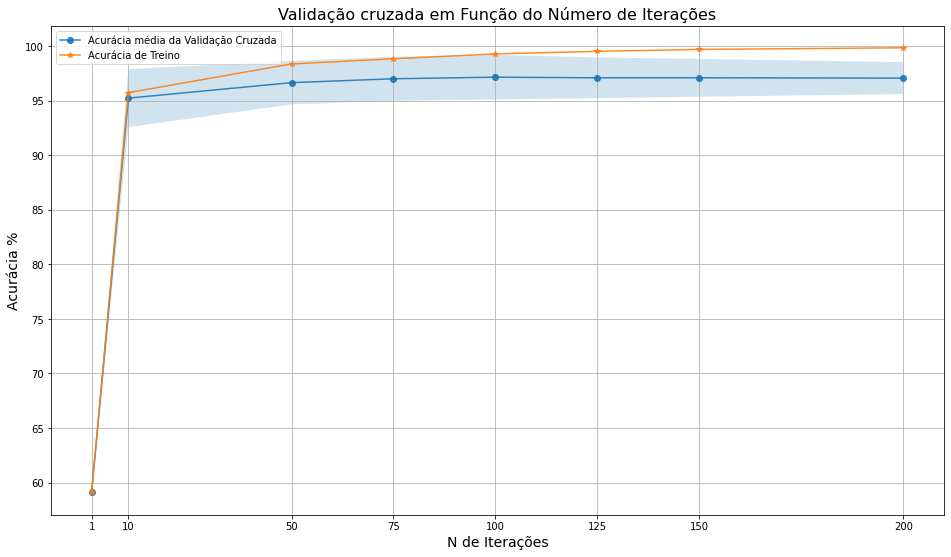

In [155]:
plot_cross_validation_on_gtb(estimadores, cv_scores_mean, cv_scores_std, accuracy_scores, "Validação cruzada em Função do Número de Iterações")

## Teste

Acurácia do GTB validação cruzada com K-fold = 5: 59.15 %
Acurácia do GTB com 1 estimadores nos dados de treino: 59.15 %
Acurácia do GTB com 1 estimadores nos dados de teste: 60.30 %
Acurácia do GTB validação cruzada com K-fold = 5: 95.24 %
Acurácia do GTB com 10 estimadores nos dados de treino: 95.74 %
Acurácia do GTB com 10 estimadores nos dados de teste: 95.33 %
Acurácia do GTB validação cruzada com K-fold = 5: 96.66 %
Acurácia do GTB com 50 estimadores nos dados de treino: 98.37 %
Acurácia do GTB com 50 estimadores nos dados de teste: 96.54 %
Acurácia do GTB validação cruzada com K-fold = 5: 97.01 %
Acurácia do GTB com 75 estimadores nos dados de treino: 98.85 %
Acurácia do GTB com 75 estimadores nos dados de teste: 96.71 %
Acurácia do GTB validação cruzada com K-fold = 5: 97.16 %
Acurácia do GTB com 100 estimadores nos dados de treino: 99.29 %
Acurácia do GTB com 100 estimadores nos dados de teste: 96.71 %
Acurácia do GTB validação cruzada com K-fold = 5: 97.10 %
Acurácia do GTB c

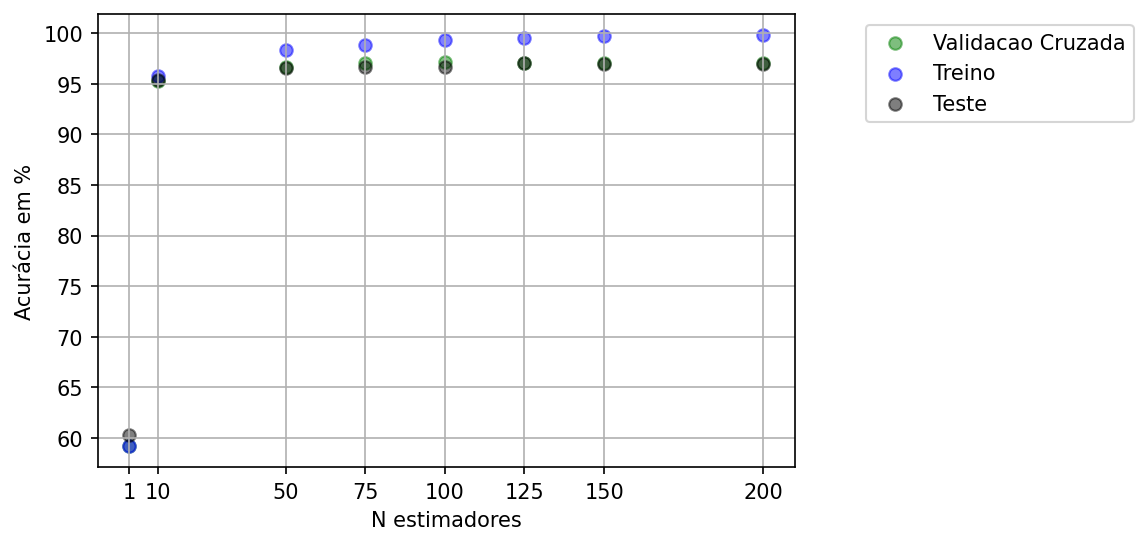

Com 125 estimadores ,obteve a melhor acuracia de teste: accuTreino=99.53% ,AccuTest=97.09 %


In [156]:
best_estimador, best_treino, best_test, accu_treino, accu_test = gtb_multi_cv(estimadores,x_train, x_test, y_train, y_test,k_fold, scoring='accuracy')

## Precision, Recall e ROC/AUC

Apesar do modelo com maior acurácia contar 125 estimadores, vamos adotar um modelo com 50 estimadores, uma vez que assim as acurácias de treino se mantém dentro de dois desvios padrões do valor da validação cruzado e se aproxima mais dos valores obtidos de teste. Além disso, acima de 50 estimadores, houve pouca melhoria de desempenho, então é recomendado escolher um modelo mais simples

In [157]:
best_estimador, best_treino, best_test

(125, 99.52676722863059, 97.0895112575508)

Considerando GTB com 50 estimadores

In [158]:
gtb_model = GradientBoostingClassifier(n_estimators=50, random_state=seed)

cv_gtb = cross_val_score(gtb_model, x_train, y_train, cv=k_fold, scoring="accuracy").mean()
print("Acurácia da Validação Cruzada obtida para GTB com 50 estimadores = {:.3f}%"
        .format(cv_gtb*100))

gtb_model.fit(x_train,y_train)
y_pred = gtb_model.predict(x_test)

treino_gtb = gtb_model.score(x_train,y_train)
print("Acurácia de treino obtida para GTB com 50 estimadores = {:.3f}%".format(treino_gtb*100))

test_gtb = gtb_model.score(x_test,y_test)
print("Acurácia de teste obtida para GTB com 50 estimadores  = {:.3f}%".format(test_gtb*100))

Acurácia da Validação Cruzada obtida para GTB com 50 estimadores = 96.658%
Acurácia de treino obtida para GTB com 50 estimadores = 98.373%
Acurácia de teste obtida para GTB com 50 estimadores  = 96.540%


In [159]:
cm = confusion_matrix(y_test, y_pred)
print("TP: {}".format(cm[0][0]))
print("FN: {}".format(cm[0][1]))
print("FP: {}".format(cm[1][0]))
print("TN: {}".format(cm[1][1]))

TP: 700
FN: 23
FP: 40
TN: 1058


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


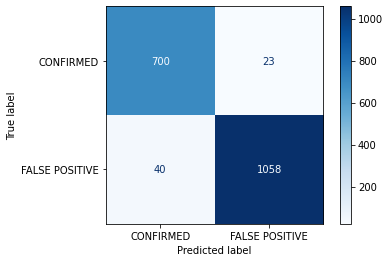

In [160]:
plot_confusion_matrix(gtb_model, x_test, y_test, cmap=plt.cm.Blues, values_format = 'd')

In [161]:
recall_gtb = sk.metrics.recall_score(y_test, y_pred, average="binary", pos_label="CONFIRMED")
precision_gtb = sk.metrics.precision_score(y_test, y_pred, average="binary", pos_label="CONFIRMED")

print("Foi obtida uma revogação = {:.2f} % e precisão = {:.2f} %".format(recall*100, precision_gtb*100))

Foi obtida uma revogação = 0.14 % e precisão = 94.59 %


Área sob a curva ROC 99.2307%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


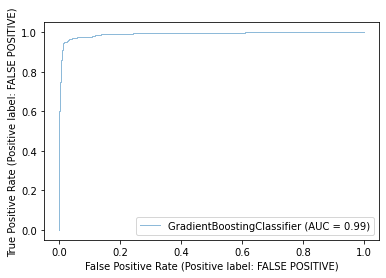

In [162]:
viz = plot_roc_curve(gtb_model, x_test, y_test, alpha=0.5, lw=1)
AUC_gtb = viz.roc_auc
print("Área sob a curva ROC {:.4f}%".format(AUC_gtb*100))

## Conclusões

Entre 10 e 125 estiamadores utilzados, ocorre aumento da performance do modelo. Ao se ultrapassar esse valor, as acurácias de treino e validação cruzada/teste começam a divergir, sugerindo que o modelo está sendo sobreajustado.

Com 125 estimadores obtive-se a melhor validação cruzada = 97.220% com acuracia de treino = 99.527%

Apesar de haver aumento de acurácia acima de 50 estimadores, há pouca melhoria, e a acurácia de treino começa a divergir, ultrapassando 2 desvios padrões de distância da validação cruzada, se tornando mais propenso a overfitting.

Dessa forma foi adotado um modelo com 50 estimadores:

Acurácia de treino obtida para GTB com 50 estimadores = 98.285%

Acurácia de teste obtida para GTB com 50 estimadores  = 96.485%

Os valores obtidos de precisão e revogação sugerem que o modelo está bem ajustado com 50 estimadores, obtendo valores acima de 94%, indicando que o modelo identifica os exemplos positivos e acerta ao classificar como positivos, o que resulta numa AUC entorno de 99%.

Foi obtida uma revogação = 96.68 % e precisão = 94.59 %

Área sob a curva ROC 99.2087%

# Comparação de performance

* Curva ROC - AUC
* Precisão - Precision
* Revocação - Recall

Colunas com os atributos a serem comparados, linhas para cada modelo selecionado

Modelos:

* Naive Bayes

* Decision Tree: Altura 5

* SVM: Kernel Linear

* KNN: 20 Vizinhos

* Random Forest: 21 Árvores

* Gradient Tree Boosting: 50 Estimadores


In [163]:
val_cruzada = np.array([cv_nb, cv_dt, cv_svmc_lin, cv_knn, cv_rf, cv_gtb])*100
acuracias_treino = np.array([treino_nb, treino_dt, treino_svmc_lin, treino_knn, treino_rf, treino_gtb])*100
acuracias_teste = np.array([teste_nb, teste_dt, teste_svmc_lin, test_knn, test_rf, test_gtb])*100
precisao = np.array([precision_nb, precision_dt, precision_svmc_lin, precision_knn, precision_rf, precision_gtb])*100
revogacao = np.array([recall_nb, recall_dt, recall_svmc_lin, recall_knn, recall_rf, recall_gtb])*100
auc = np.array([AUC_nb, AUC_dt, AUC_svmc_lin, AUC_knn, AUC_rf, AUC_gtb])*100

As particularidades de cada modelo foram discutidas cada uma em sua seção. 

A tabela abaixo mostra um resumo dos valores de Acurácia em Validação cruzada, Treino, Teste, Precisão, Revogação e Área abaixo da curva ROC.

In [164]:
modelos = ["NB", "DT", "SVM", "KNN", "RF", "GTB"]

In [165]:
df = pd.DataFrame({
    "Validacao_cruzada" : val_cruzada,
    "Acuracia_Treino"   : acuracias_treino,
    "Acuracia_Teste"    : acuracias_teste,
    "Precision"         : precisao,
    "Recall"            : revogacao,
    "AUC_ROC"           : auc
})
#colocar nome nas linhas: Modelo
df.rename(index={0: modelos[0], 1: modelos[1], 2: modelos[2], 3:modelos[3], 4:modelos[4], 5:modelos[5]}, inplace=True)
df

,Validacao_cruzada,Acuracia_Treino,Acuracia_Teste,Precision,Recall,AUC_ROC
NB,91.718598,91.422656,91.213619,83.392645,97.233748,97.564288
DT,94.587984,95.918367,94.453597,89.168766,97.925311,96.858427
SVM,94.942751,95.622597,94.892916,90.909091,96.818811,98.583997
KNN,81.662967,83.821355,81.768259,69.767442,95.435685,91.579308
RF,96.806176,99.970423,96.595277,95.712310,95.712310,99.387104
GTB,96.658159,98.373262,96.540362,94.594595,96.818811,99.230715


Pela tabela podemos observar que os modelos que obtiveram o melhor dempenho foram o Gradient Tree Boosting e o Random Forest. Ambos obtiveram acurácia de validação cruzada acima de 96,65%, acurácia de treino superior à 96,54% , precisão e revogração em torno de 95% e área sob a curva ROC superior à 99%. 


In [166]:
df["AUC_ROC"]

NB     97.564288
DT     96.858427
SVM    98.583997
KNN    91.579308
RF     99.387104
GTB    99.230715
Name: AUC_ROC, dtype: float64

Plot ROC comparando

In [167]:
classificadores = [classifier_gnb, Dtree_clf, svmc_classifier_lin, knn_model, rf_classifier, gtb_model]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. U

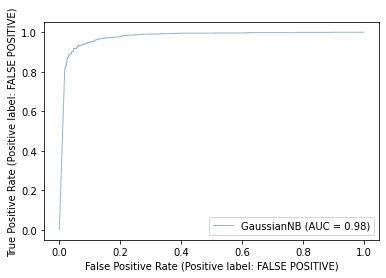

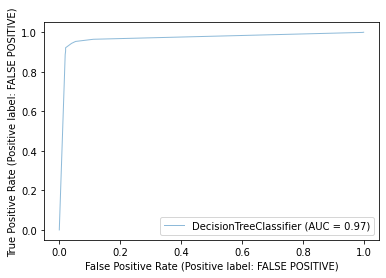

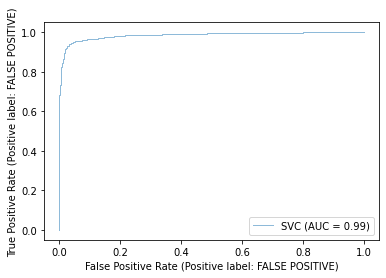

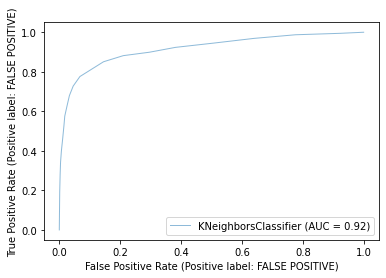

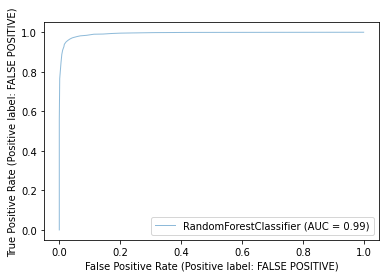

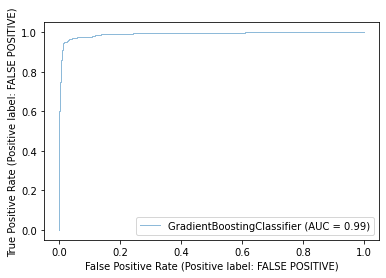

In [168]:
for i in classificadores:
  plot_roc_curve(i, x_test, y_test, alpha=0.5, lw=1)